# 2nd Homework of ADM

## Group #21 members
1. Nurbek Khalmatay, 2184569, khalmatay.2184569@studenti.uniroma1.it
2. Augusto de Luzenberger Milnernsheim, 1601656, deluzenbergermilnernsheim.1601657@studenti.uniroma1.it
3. Sezer Mezgil, 2180600, sezermzgl@gmail.com
4. Paolo Cencia, 1963348, cencia.1963348@studenti.uniroma1.it

In [2]:

%%capture
# Set to True the first time you run this file to install the required packages
install_packages = True
if install_packages:
    %pip install -r requirements.txt
import os

if not os.path.exists('data'):
    os.makedirs('data')

if not all(os.path.exists(folder) for folder in ['data/steam_reviews.csv']):
    !gdown 1ELFPkOeFlwHth8zq5-54xXytZKy0xs-c
    !unzip -o data_steam_reviews.zip
    !rm data_steam_reviews.zip
    !mv steam_reviews.csv data/steam_reviews.csv


### Libraries, (if you wand add import ... , add also in requrements.txt)

In [3]:
import pandas as pd
import plotly.express as px
from typing import List, Tuple
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.ticker as mticker
import seaborn as sns 
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import statsmodels.api as sm
import re
from scipy.stats import chi2_contingency


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

csv_file_path = 'data/steam_reviews.csv'

---
# RQ1
---

In [6]:
df = pd.read_csv(csv_file_path)
df.head()

Unnamed: 0  app_id                  app_name  review_id  language  \
0           0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1           1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2           2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3           3  292030  The Witcher 3: Wild Hunt   85184605   english   
4           4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

                                              review  timestamp_created  \
0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了         1611381629   
1                                 拔DIAO无情打桩机--杰洛特!!!         1611381030   
2                                              巫师3NB         1611380800   
3  One of the best RPG's of all time, worthy of a...         1611379970   
4                                                 大作         1611379427   

   timestamp_updated  recommended  votes_helpful  votes_funny  \
0         1611381629         True              0            0   
1         1611381030         True              0            0   
2         1611380800         True              0            0   
3         1611379970         True              0            0   
4         1611379427         True              0            0   

   weighted_vote_score  comment_count  steam_purchase  received_for_free  \
0                0.000              0            True              False   
1                0.000              0            True              False   
2                0.000              0            True              False   
3                0.000              0            True              False   
4                0.000              0            True              False   

   written_during_early_access     author.steamid  author.num_games_owned  \
0                        False  76561199095369542                       6   
1                        False  76561198949504115                      30   
2                        False  76561199090098988                       5   
3                        False  76561199054755373                       5   
4                        False  76561199028326951                       7   

   author.num_reviews  author.playtime_forever  \
0                   2                 1909.000   
1                  10                 2764.000   
2                   1                 1061.000   
3                   3                 5587.000   
4                   4                  217.000   

   author.playtime_last_two_weeks  author.playtime_at_review  \
0                        1448.000                   1909.000   
1                        2743.000                   2674.000   
2                        1061.000                   1060.000   
3                        3200.000                   5524.000   
4                          42.000                    217.000   

   author.last_played  
0      1611343383.000  
1      1611386307.000  
2      1611383777.000  
3      1611383744.000  
4      1610788249.000

# Drop Unnecessary Column
The `Unnamed: 0` column is removed from the DataFrame as it serves no purpose in the analysis. This column is likely an index column generated during data loading and duplicates the row index, so we drop it to clean up the dataset.


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# Check DataFrame Dimensions
Using `df.shape` to display the dimensions of the DataFrame. This shows the number of rows and columns in the dataset, giving an initial understanding of its size.


In [8]:
df.shape


(21747371, 22)

# Check for Missing Values
Using `df.isnull().sum()` to identify columns with missing values and the total count per column. Although some columns, like `review` and `author.playtime_at_review`, contain null values, they won’t impact the analysis, so we won’t be dropping or filling these missing values.


In [9]:
df.isnull().sum()

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

# DataFrame Overview
Using `df.info()` to get a concise summary of the DataFrame, including the number of non-null entries in each column and their data types. This provides a quick overview of the dataset’s structure and helps assess data completeness.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

# Statistical Summary of Numerical Columns
Using `df.describe()` to generate summary statistics for all numerical columns in the DataFrame, such as mean, standard deviation, minimum, and maximum values. This provides insight into the distribution and range of values in these columns.


In [11]:
df.describe()

app_id    review_id  timestamp_created  timestamp_updated  \
count 21747371.000 21747371.000       21747371.000       21747371.000   
mean    392818.082 51874995.361     1544432473.640     1547555664.106   
std     248097.740 20842672.746       58121938.250       56898992.167   
min         70.000       43.000     1290197836.000     1290197836.000   
25%     242760.000 36393551.500     1510222771.000     1511729490.000   
50%     359550.000 53840585.000     1562446372.000     1572188594.000   
75%     578080.000 69287931.500     1589696048.500     1591402887.500   
max    1291340.000 85218673.000     1611426287.000     2283382797.000   

          votes_helpful    votes_funny  weighted_vote_score  comment_count  \
count      21747371.000   21747371.000         21747371.000   21747371.000   
mean         404468.855     126791.726                0.165          0.131   
std      1333740760.952   23335525.905                0.243          2.199   
min               0.000          0.000                0.000          0.000   
25%               0.000          0.000                0.000          0.000   
50%               0.000          0.000                0.000          0.000   
75%               1.000          0.000                0.483          0.000   
max   4398046511106.000 4294967295.000                0.996       4893.000   

             author.steamid  author.num_games_owned  author.num_reviews  \
count          21747371.000            21747371.000        21747371.000   
mean  76561198300873216.000             1011300.097          404477.480   
std           317943800.340          2108829161.080      1333740760.918   
min   76561197960265728.000                   0.000               1.000   
25%   76561198071333584.000                  22.000               2.000   
50%   76561198176641696.000                  61.000               4.000   
75%   76561198379406576.000                 145.000              10.000   
max   76561199133265376.000       4398046511619.000   4398046511108.000   

       author.playtime_forever  author.playtime_last_two_weeks  \
count             21747369.000                    21747369.000   
mean                 16091.050                         155.542   
std                  37430.568                         730.049   
min                      0.000                           0.000   
25%                   1250.000                           0.000   
50%                   4307.000                           0.000   
75%                  14912.000                           0.000   
max                3744943.000                       27039.000   

       author.playtime_at_review  author.last_played  
count               21721689.000        21747369.000  
mean                    8807.421      1580505062.058  
std                    23885.531        46761775.230  
min                        1.000               0.000  
25%                      559.000      1573329476.000  
50%                     1881.000      1599058030.000  
75%                     6823.000      1609002209.000  
max                  3228103.000      1611434142.000

# Distribution of Recommendations
Using a count plot to visualize the distribution of the `recommended` column, which shows the number of positive and negative recommendations. This provides insight into the overall sentiment of the reviews, with a significantly higher count of positive recommendations.


/var/folders/2n/w4ltzfmx2tx7rpcv2z1fm1gm0000gn/T/ipykernel_80882/4140634122.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(['{:,}'.format(int(y)) for y in plot.get_yticks()])


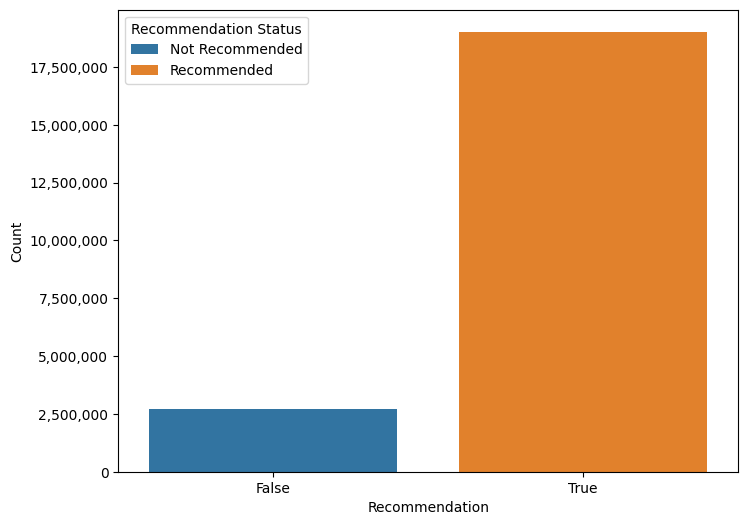

In [12]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='recommended', data=df)
plot.set_yticklabels(['{:,}'.format(int(y)) for y in plot.get_yticks()])
plot.set_xlabel("Recommendation")
plot.set_ylabel("Count")

labels = ['Not Recommended', 'Recommended']
for bar, label in zip(plot.patches, labels):
    bar.set_label(label)
plot.legend(title="Recommendation Status")

plt.show()


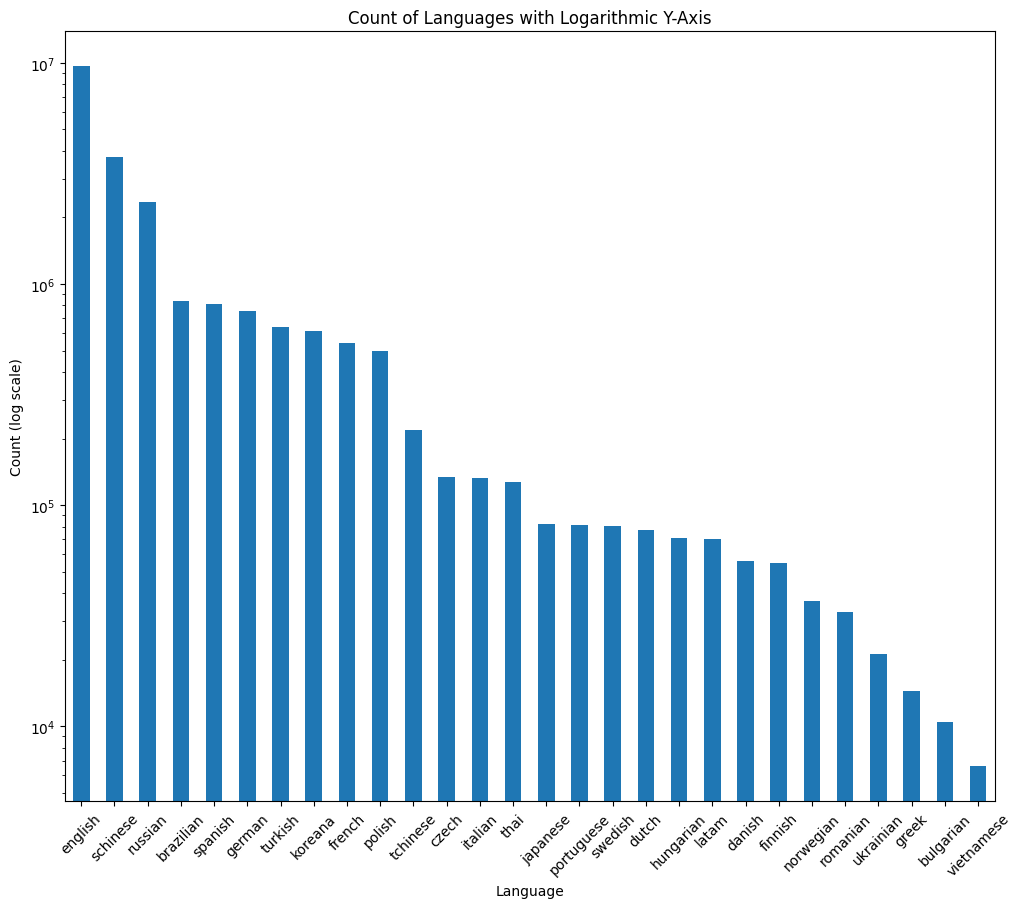

In [13]:
language_counts = df['language'].value_counts()

plt.figure(figsize=(12, 10))
language_counts.plot(kind='bar')
plt.yscale('log')

plt.title('Count of Languages with Logarithmic Y-Axis')
plt.xlabel('Language')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.show()

Since the top three languages are English, Simplified Chinese, and Russian, let’s identify the top 10 games with reviews in each of these languages.

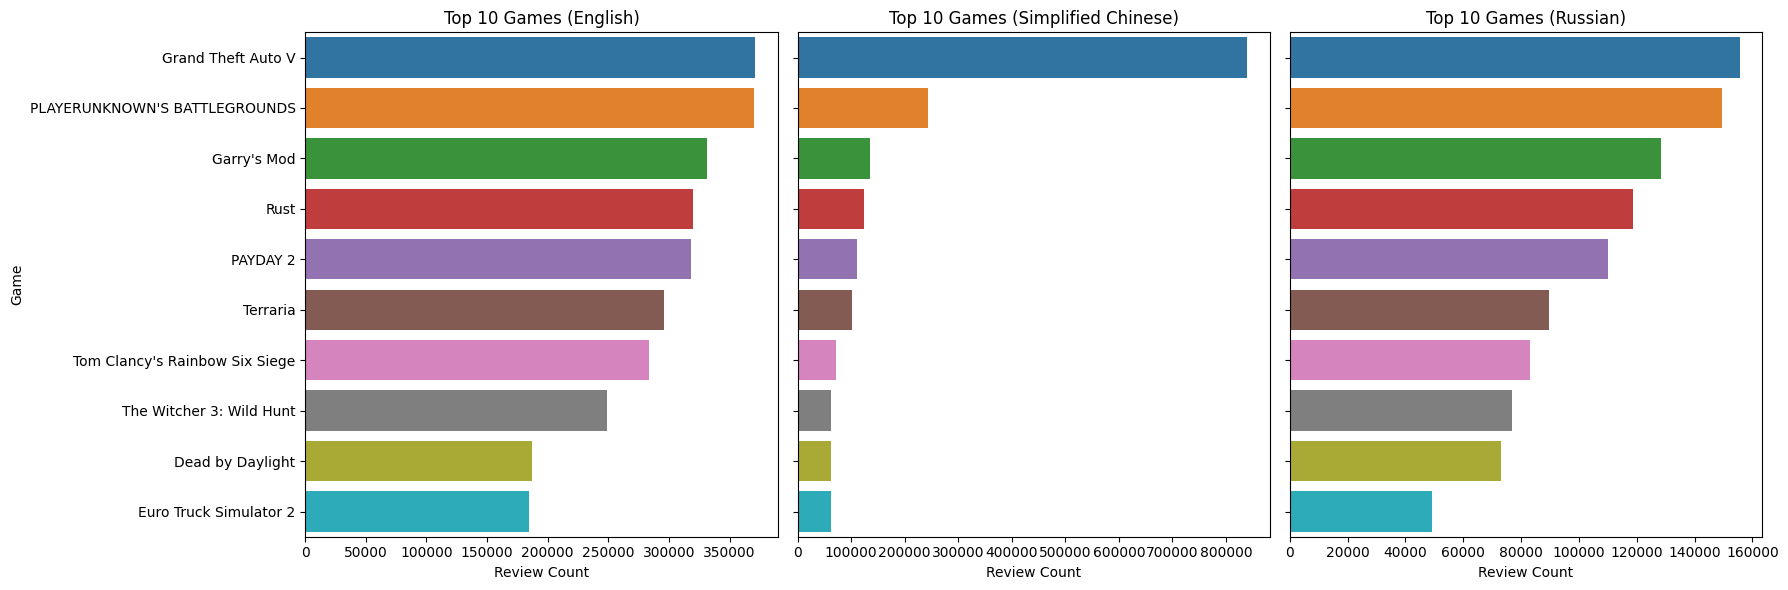

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

languages = ['english', 'schinese', 'russian']
titles = ['Top 10 Games (English)', 'Top 10 Games (Simplified Chinese)', 'Top 10 Games (Russian)']

for i, language in enumerate(languages):
    language_df = df[df['language'] == language]
    
    top_games = language_df['app_name'].value_counts().head(10)
    
    sns.barplot(x=top_games.values, y=top_games.index, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Review Count')
    if i == 0:
        axes[i].set_ylabel('Game')

plt.tight_layout()
plt.show()

# Top 20 Games Recommendation Distribution
This section visualizes the recommendation distribution for the top 20 most-reviewed games. Each subplot represents a game, with bars showing the count of reviews that are either recommended (True) or not recommended (False). 

By examining these plots, we can observe the proportion of positive and negative reviews for each game, giving insight into the general sentiment and popularity of these top games. This layout helps compare recommendations across popular titles in a clear, side-by-side format.


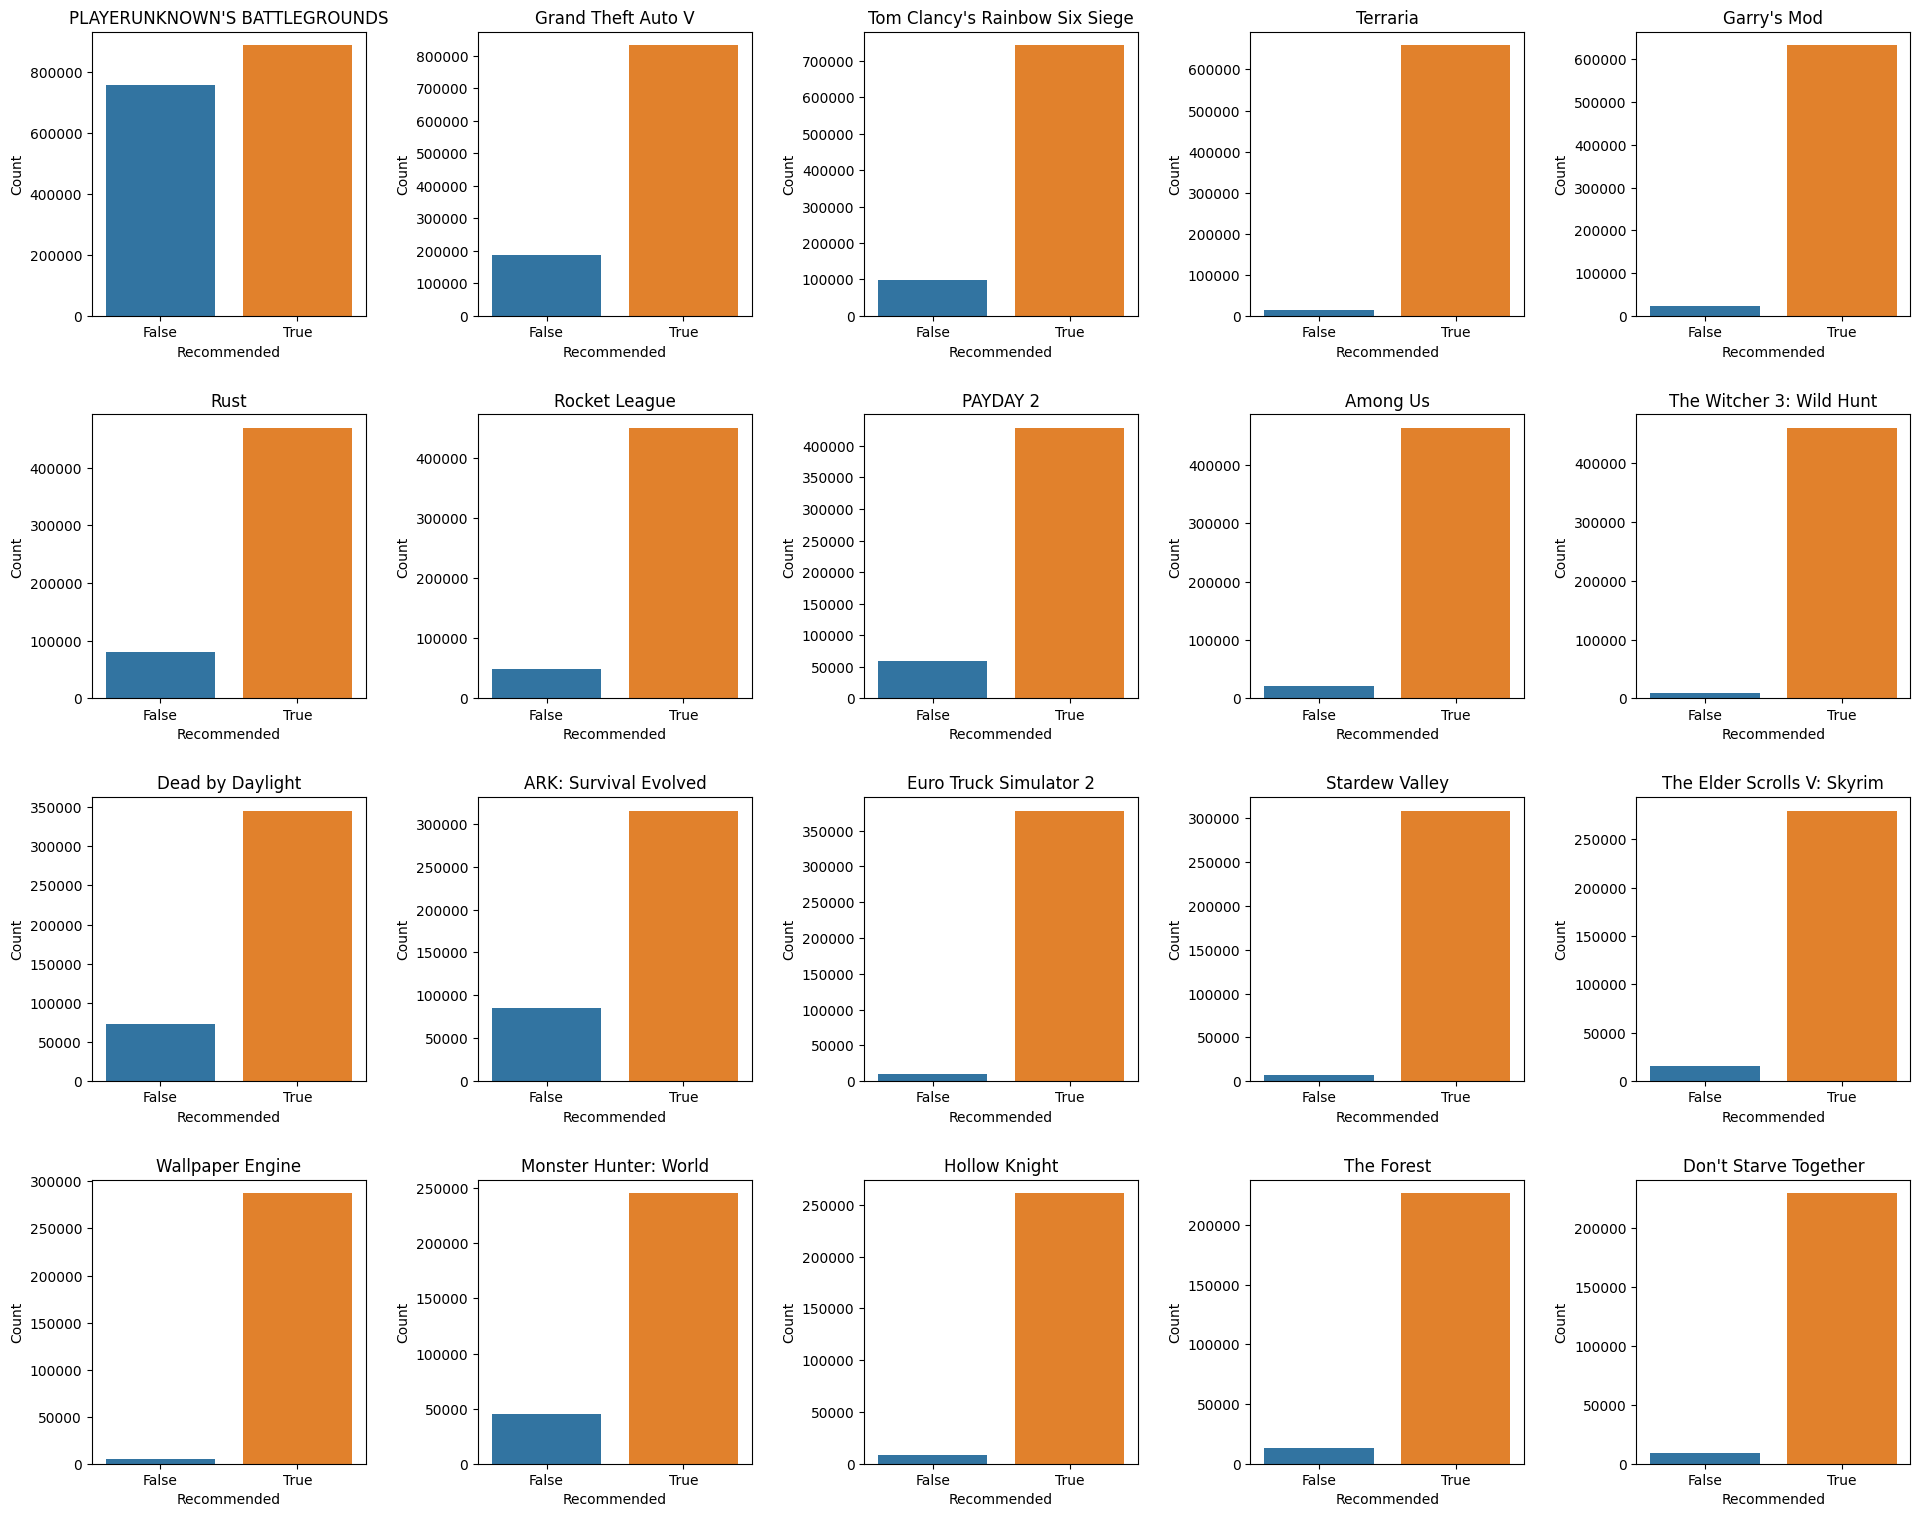

In [15]:
top_20_games = df['app_name'].value_counts().head(20).index

recommendations_per_game = df.groupby(['app_name', 'recommended']).size().reset_index(name='count')

fig, axes = plt.subplots(4, 5, figsize=(20, 16))  
fig.tight_layout(pad=5.0)  

for i, game in enumerate(top_20_games):
    
    game_data = recommendations_per_game[recommendations_per_game['app_name'] == game]
    
   
    ax = axes[i // 5, i % 5] 
    
    sns.barplot(x='recommended', y='count', data=game_data, ax=ax)
    
    ax.set_title(f"{game}")
    ax.set_xlabel("Recommended")
    ax.set_ylabel("Count")

plt.show()


# Language Distribution with Logarithmic Scale
This bar chart displays the count of different languages in the dataset, with the y-axis on a logarithmic scale. By using a log scale, we can more effectively visualize the wide range of language counts, highlighting both the most common languages (e.g., English and Chinese) and the less frequent ones. This approach makes it easier to see variations across languages that would otherwise be difficult to observe on a linear scale.


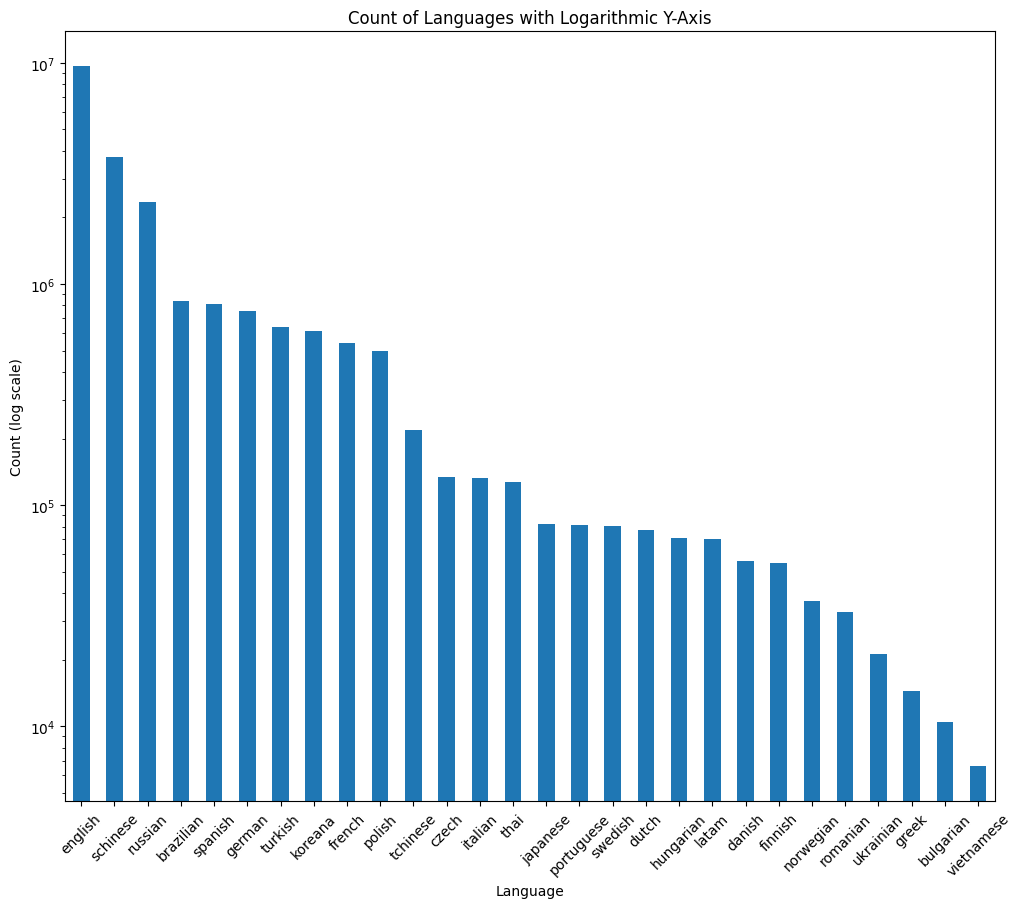

In [16]:
language_counts = df['language'].value_counts()

plt.figure(figsize=(12, 10))
language_counts.plot(kind='bar')
plt.yscale('log')

plt.title('Count of Languages with Logarithmic Y-Axis')
plt.xlabel('Language')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.show()

# Calculate Proportions for Recommendations in Early Access vs. Not Early Access
This section prepares data for visualizing the proportions of positive and negative recommendations within Early Access and Not Early Access games. These proportions will be used in the bar charts to compare recommendation rates across different release stages.

1. **Filter Positive and Negative Reviews**:
   - `df_rcm_f`: Filters reviews marked as `False` (not recommended).
   - `df_rcm_t`: Filters reviews marked as `True` (recommended).

2. **Total Counts of Positive and Negative Reviews**:
   - `total_bad_rcm`: Total number of negative reviews.
   - `total_good_rcm`: Total number of positive reviews.

3. **Counts by Access Type**:
   - **For Negative (Not Recommended) Reviews**:
     - `total_bad_rcm_early_access`: Counts negative reviews for Early Access games.
     - `total_bad_rcm_not_early_access`: Counts negative reviews for Not Early Access games.
   - **For Positive (Recommended) Reviews**:
     - `total_good_rcm_early_access`: Counts positive reviews for Early Access games.
     - `total_good_rcm_not_early_access`: Counts positive reviews for Not Early Access games.

4. **Calculate Proportions for Each Category**:
   - **Early Access Proportions**:
     - `proportion_bad_early_access`: Proportion of negative reviews in Early Access.
     - `proportion_good_early_access`: Proportion of positive reviews in Early Access.
   - **Not Early Access Proportions**:
     - `proportion_bad_not_early_access`: Proportion of negative reviews in Not Early Access.
     - `proportion_good_not_early_access`: Proportion of positive reviews in Not Early Access.

These calculated proportions (`early_access_proportions` and `not_early_access_proportions`) are then used to create side-by-side bar charts, showing the distribution of positive and negative reviews for Early Access and Not Early Access games.


In [17]:
df_rcm_f = df[df['recommended']==False]
df_rcm_t = df[df['recommended']==True]


In [18]:
total_bad_rcm = len(df_rcm_f)

total_bad_rcm_early_access = len(df_rcm_f[df_rcm_f['written_during_early_access'] == True])
total_bad_rcm_not_early_access = len(df_rcm_f[df_rcm_f['written_during_early_access'] == False])



proportion_bad_early_access = (total_bad_rcm_early_access / total_bad_rcm) * 100

proportion_bad_early_access

13.085257752881812

In [19]:
proportion_bad_not_early_access = (total_bad_rcm_not_early_access/ total_bad_rcm)* 100
proportion_bad_not_early_access

86.9147422471182

In [20]:
total_good_rcm = len(df_rcm_t)

total_good_rcm_early_access = len(df_rcm_t[df_rcm_t['written_during_early_access'] == True])
total_good_rcm_not_early_access = len(df_rcm_t[df_rcm_t['written_during_early_access'] == False])



proportion_good_early_access = (total_good_rcm_early_access / total_good_rcm) * 100

proportion_good_early_access


8.725632287052091

In [21]:
proportion_good_not_early_access = (total_good_rcm_not_early_access / total_good_rcm) * 100
proportion_good_not_early_access

91.2743677129479

# Comparison of Recommendations in Early Access vs. Not Early Access
These bar charts compare the proportion of positive (recommended) and negative (not recommended) reviews for Early Access and Not Early Access games separately. 

- **Early Access**: Shows a lower proportion of both positive and negative recommendations, reflecting the potentially limited stability and feature set of early-stage games.
- **Not Early Access**: Exhibits a higher overall recommendation rate, indicating that games with a full release status generally receive more stable feedback.

This visualization highlights how user recommendations differ based on the release status, offering insight into user sentiment and expectations for Early Access vs. fully released games.


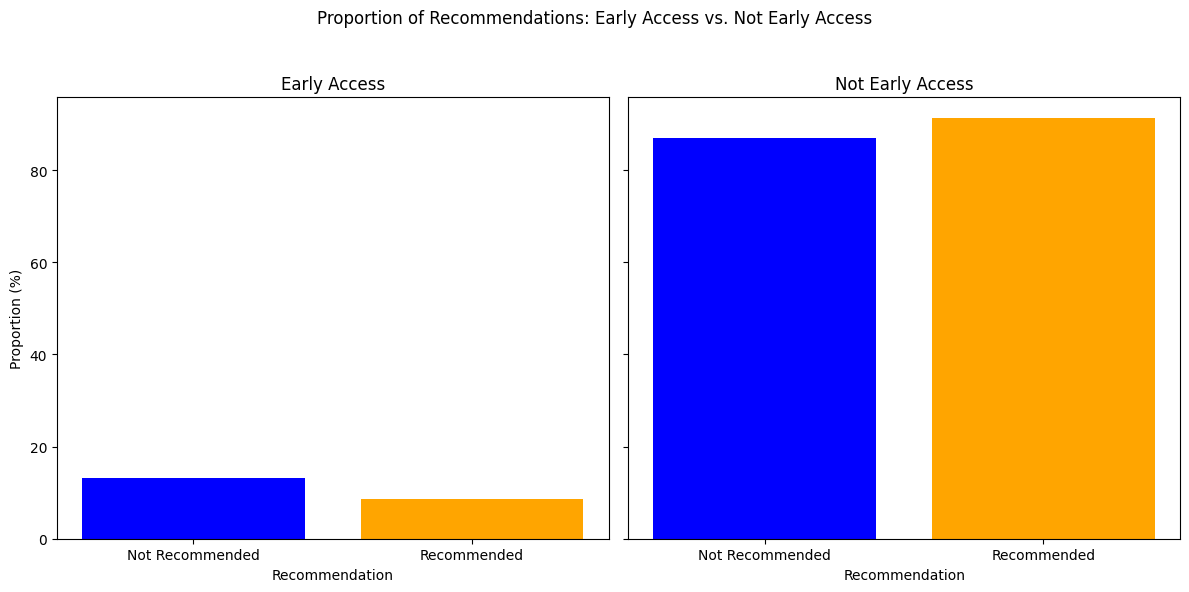

In [22]:
labels = ['Not Recommended', 'Recommended']
early_access_proportions = [proportion_bad_early_access, proportion_good_early_access]
not_early_access_proportions = [proportion_bad_not_early_access, proportion_good_not_early_access]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].bar(labels, early_access_proportions, color=['blue', 'orange'])
axes[0].set_title('Early Access')
axes[0].set_ylabel('Proportion (%)')
axes[0].set_xlabel('Recommendation')

axes[1].bar(labels, not_early_access_proportions, color=['blue', 'orange'])
axes[1].set_title('Not Early Access')
axes[1].set_xlabel('Recommendation')

# Overall title for the figure
fig.suptitle('Proportion of Recommendations: Early Access vs. Not Early Access')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


---
# RQ2
---

In [23]:
#of course the path to the file is the one on my computer since it was not on the repo
df = pd.read_csv(csv_file_path, usecols = ['app_name','review','review_id','recommended', 'steam_purchase', 'received_for_free' ])

## Cleaning the data

We firstly need to check for any missing entries in the data.

In [24]:
df.isna().sum()

app_name                 0
review_id                0
review               33742
recommended              0
steam_purchase           0
received_for_free        0
dtype: int64

>There are as we can see 33748 reviews "missing", or more preciselly reviews with no text inside. These can still be considered in the review count for each application because the users still gave a positive or negative recommendation:

In [25]:
# just a look to show the point
df[['review', 'review_id', 'recommended']].loc[(df['review'].isna()) & (df['recommended'] == True) ]

review  review_id  recommended
32          NaN   85176661         True
116         NaN   85157446         True
234         NaN   85137051         True
653         NaN   85054410         True
700         NaN   85046235         True
...         ...        ...          ...
21742475    NaN   65683010         True
21743370    NaN   65674271         True
21744390    NaN   65665688         True
21745382    NaN   65659679         True
21746746    NaN   65651280         True

[32807 rows x 3 columns]

>Since there are no value missing we can count the number of occurencies for each app_name value to get the list of the top and lowest five apps for number of reviews received.



---
## 2.1 
### Identify which applications have the highest and lowest number of reviews.
---

In [26]:
df['app_name'].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS      1644255
Grand Theft Auto V                 1019116
Tom Clancy's Rainbow Six Siege      841918
Terraria                            672815
Garry's Mod                         655524
                                    ...   
Don't Escape: 4 Days to Survive       1013
Out of the Park Baseball 19            700
Shadow Complex Remastered              700
DRAGON QUEST HEROES™ II                600
Neon Hardcorps                         200
Name: app_name, Length: 315, dtype: int64

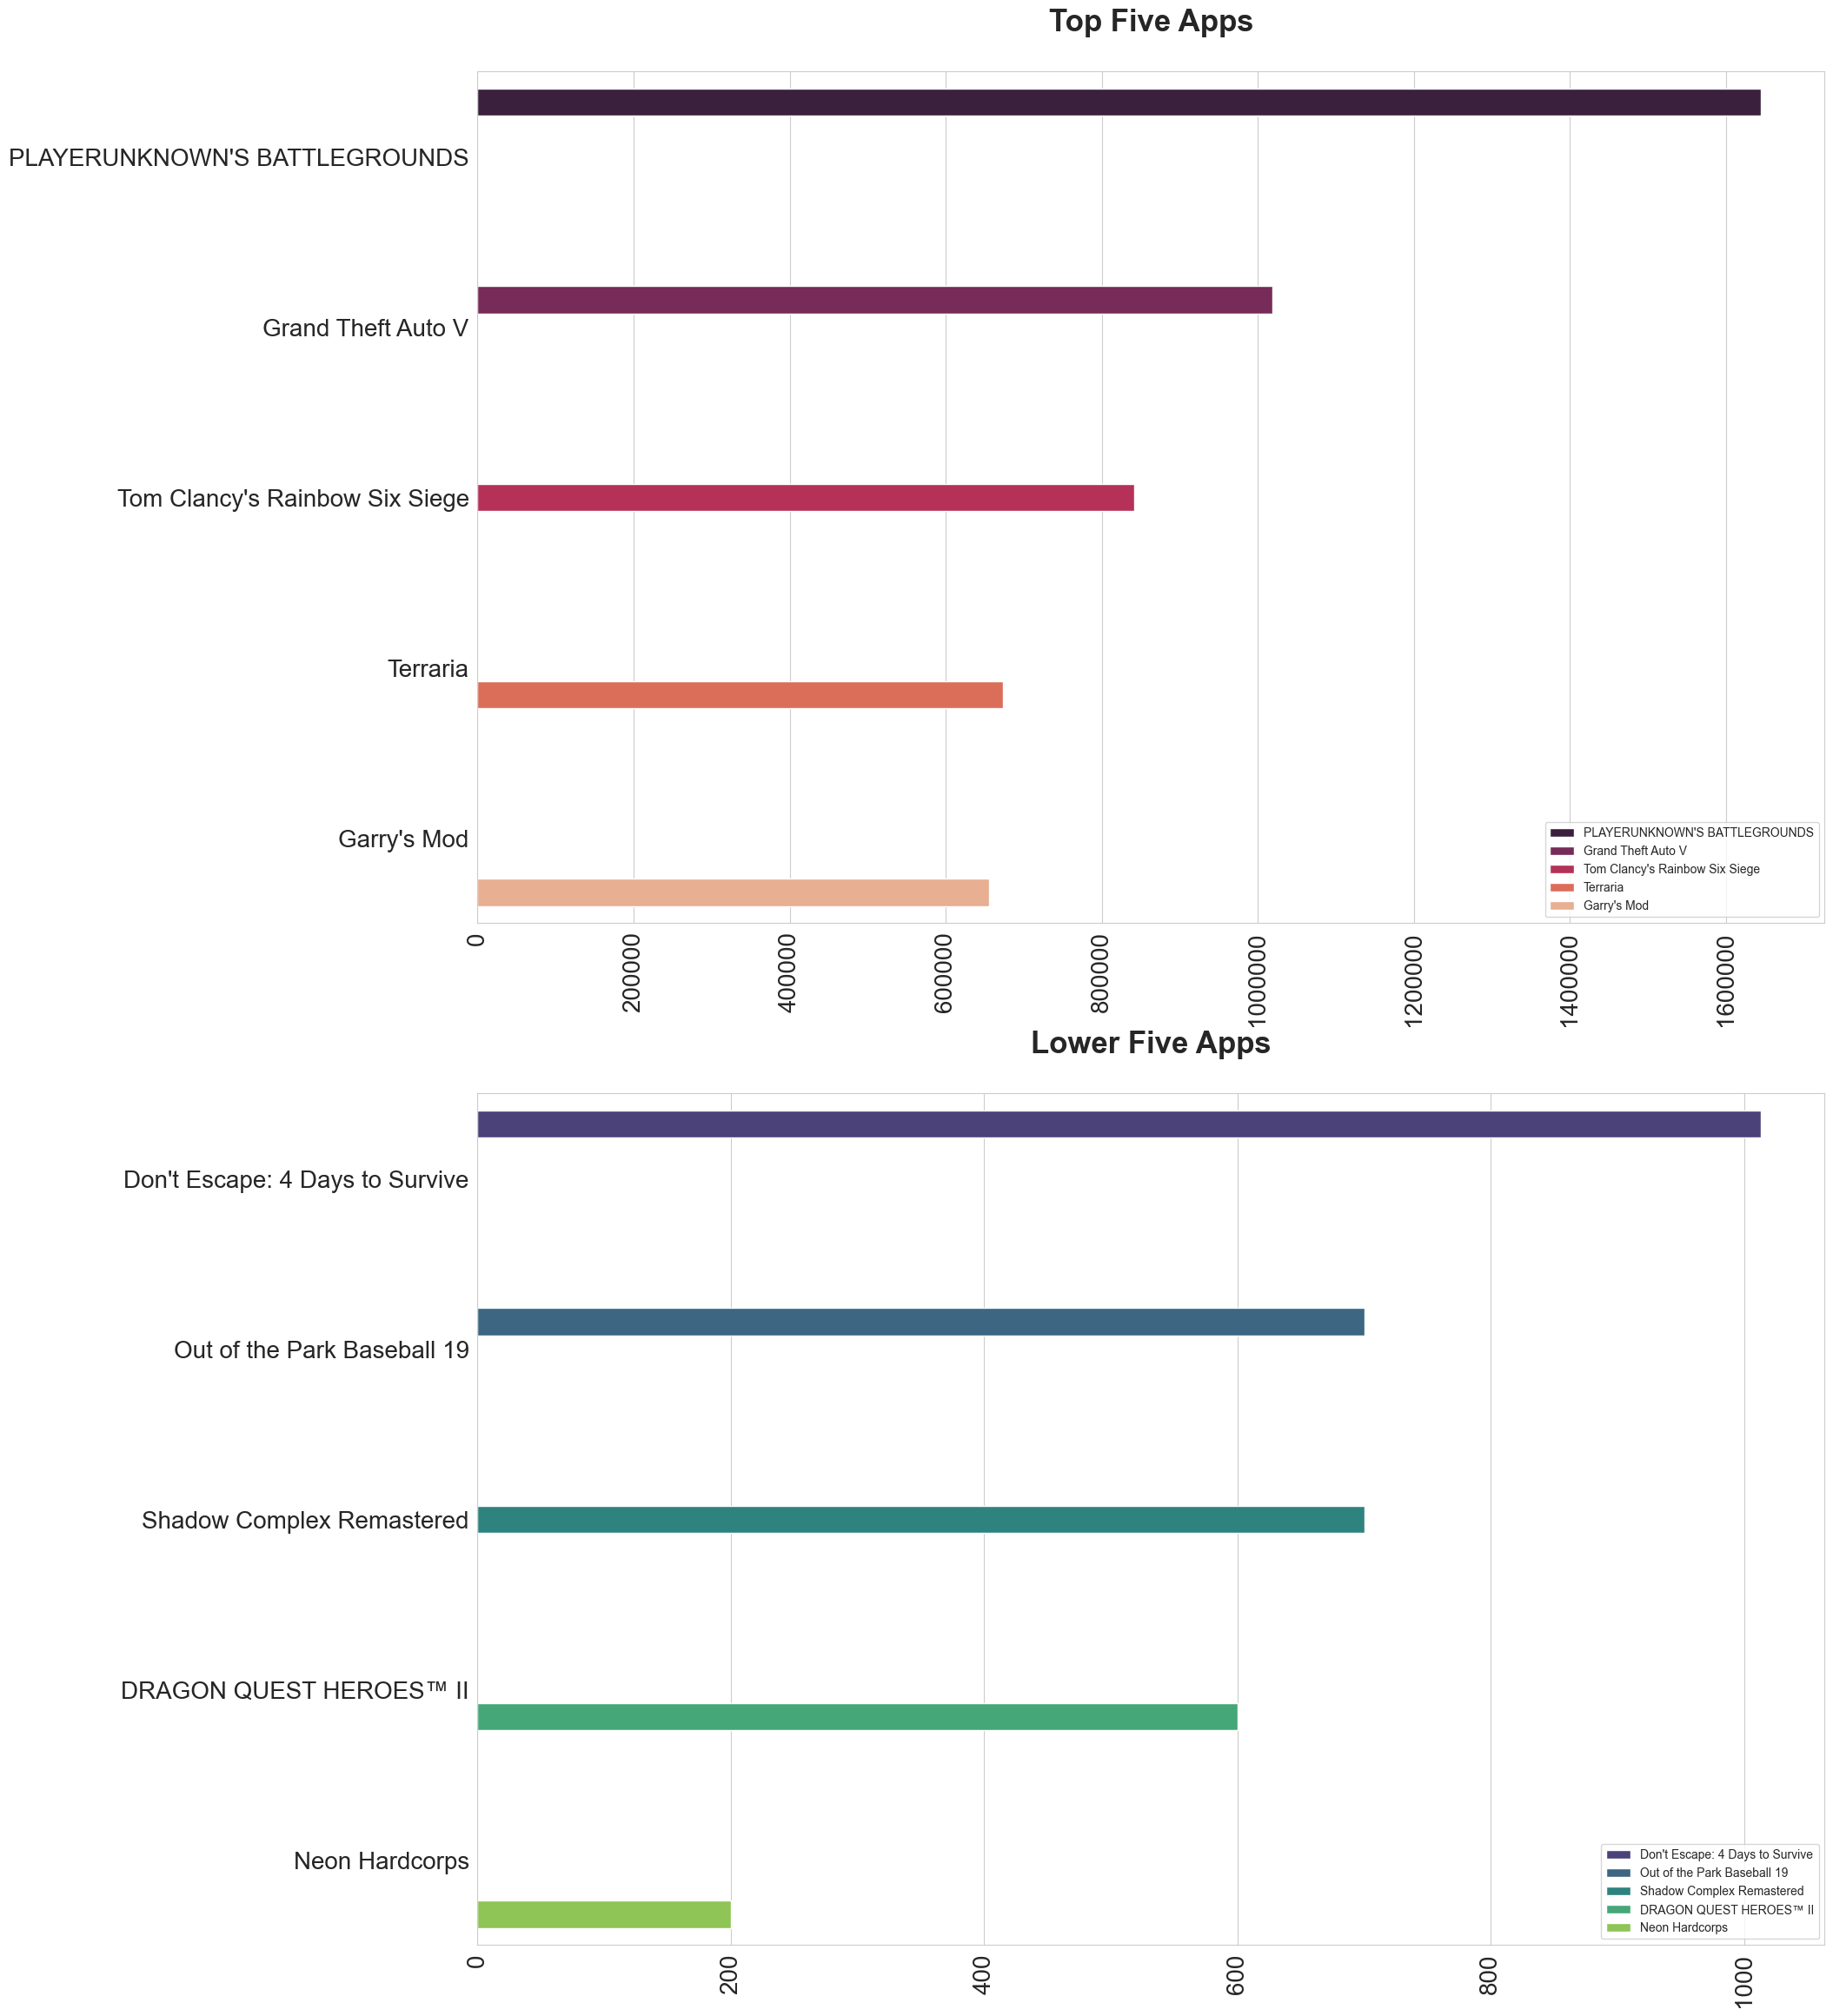

In [27]:
# get the first and last five app, and their number of reviews
top_5 = df['app_name'].value_counts()[:5]
lower_5 = df['app_name'].value_counts()[-5:]

#plot them in an orizontal barplot with different color to better highlight the differences in absolute value
sns.set_style("whitegrid") 

#this code is used to create a figure of two plots one over the other
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 28))

#we then plot by using the .values and .index of the two variables created before
sns.barplot(x = top_5.values, y = top_5.index, ax=  ax[0], hue= top_5.index, palette = 'rocket', orient='h')
ax[0].set_title('Top Five Apps\n', fontsize = 25, fontweight='bold')
ax[0].tick_params(axis='x', rotation =90, labelsize = 20)
ax[0].tick_params(axis='y',  labelsize = 20)
ax[0].set_ylabel(None)
ax[0].get_xaxis().get_major_formatter().set_scientific(False)


sns.barplot(x = lower_5.values, y = lower_5.index, hue= lower_5.index,ax = ax[1], palette = 'viridis', orient='h')
ax[1].set_title('Lower Five Apps\n', fontsize = 25,fontweight='bold')
ax[1].tick_params(axis= 'x', rotation= 90, labelsize = 20)
ax[1].tick_params(axis='y',  labelsize = 20)
ax[1].set_ylabel(None)

plt.show()


---
## 2.2 
### Plot the number of reviews for each application in descending order. What insights can you draw from the plot?
---

In [28]:
# Function to remove non-ASCII characters
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply the function to all the entries in the column, since there are many symbols that created problemns in later plots
df['app_name'] = df['app_name'].apply(remove_non_ascii)

df['app_name'].describe()

count                          21747371
unique                              315
top       PLAYERUNKNOWN'S BATTLEGROUNDS
freq                            1644255
Name: app_name, dtype: object

>As we can see there are more than 300 applications in this dataset, so the plot would be very difficult to read with the name tags on the axis, but we could still get an idea of the shape of the curve by omitting them.

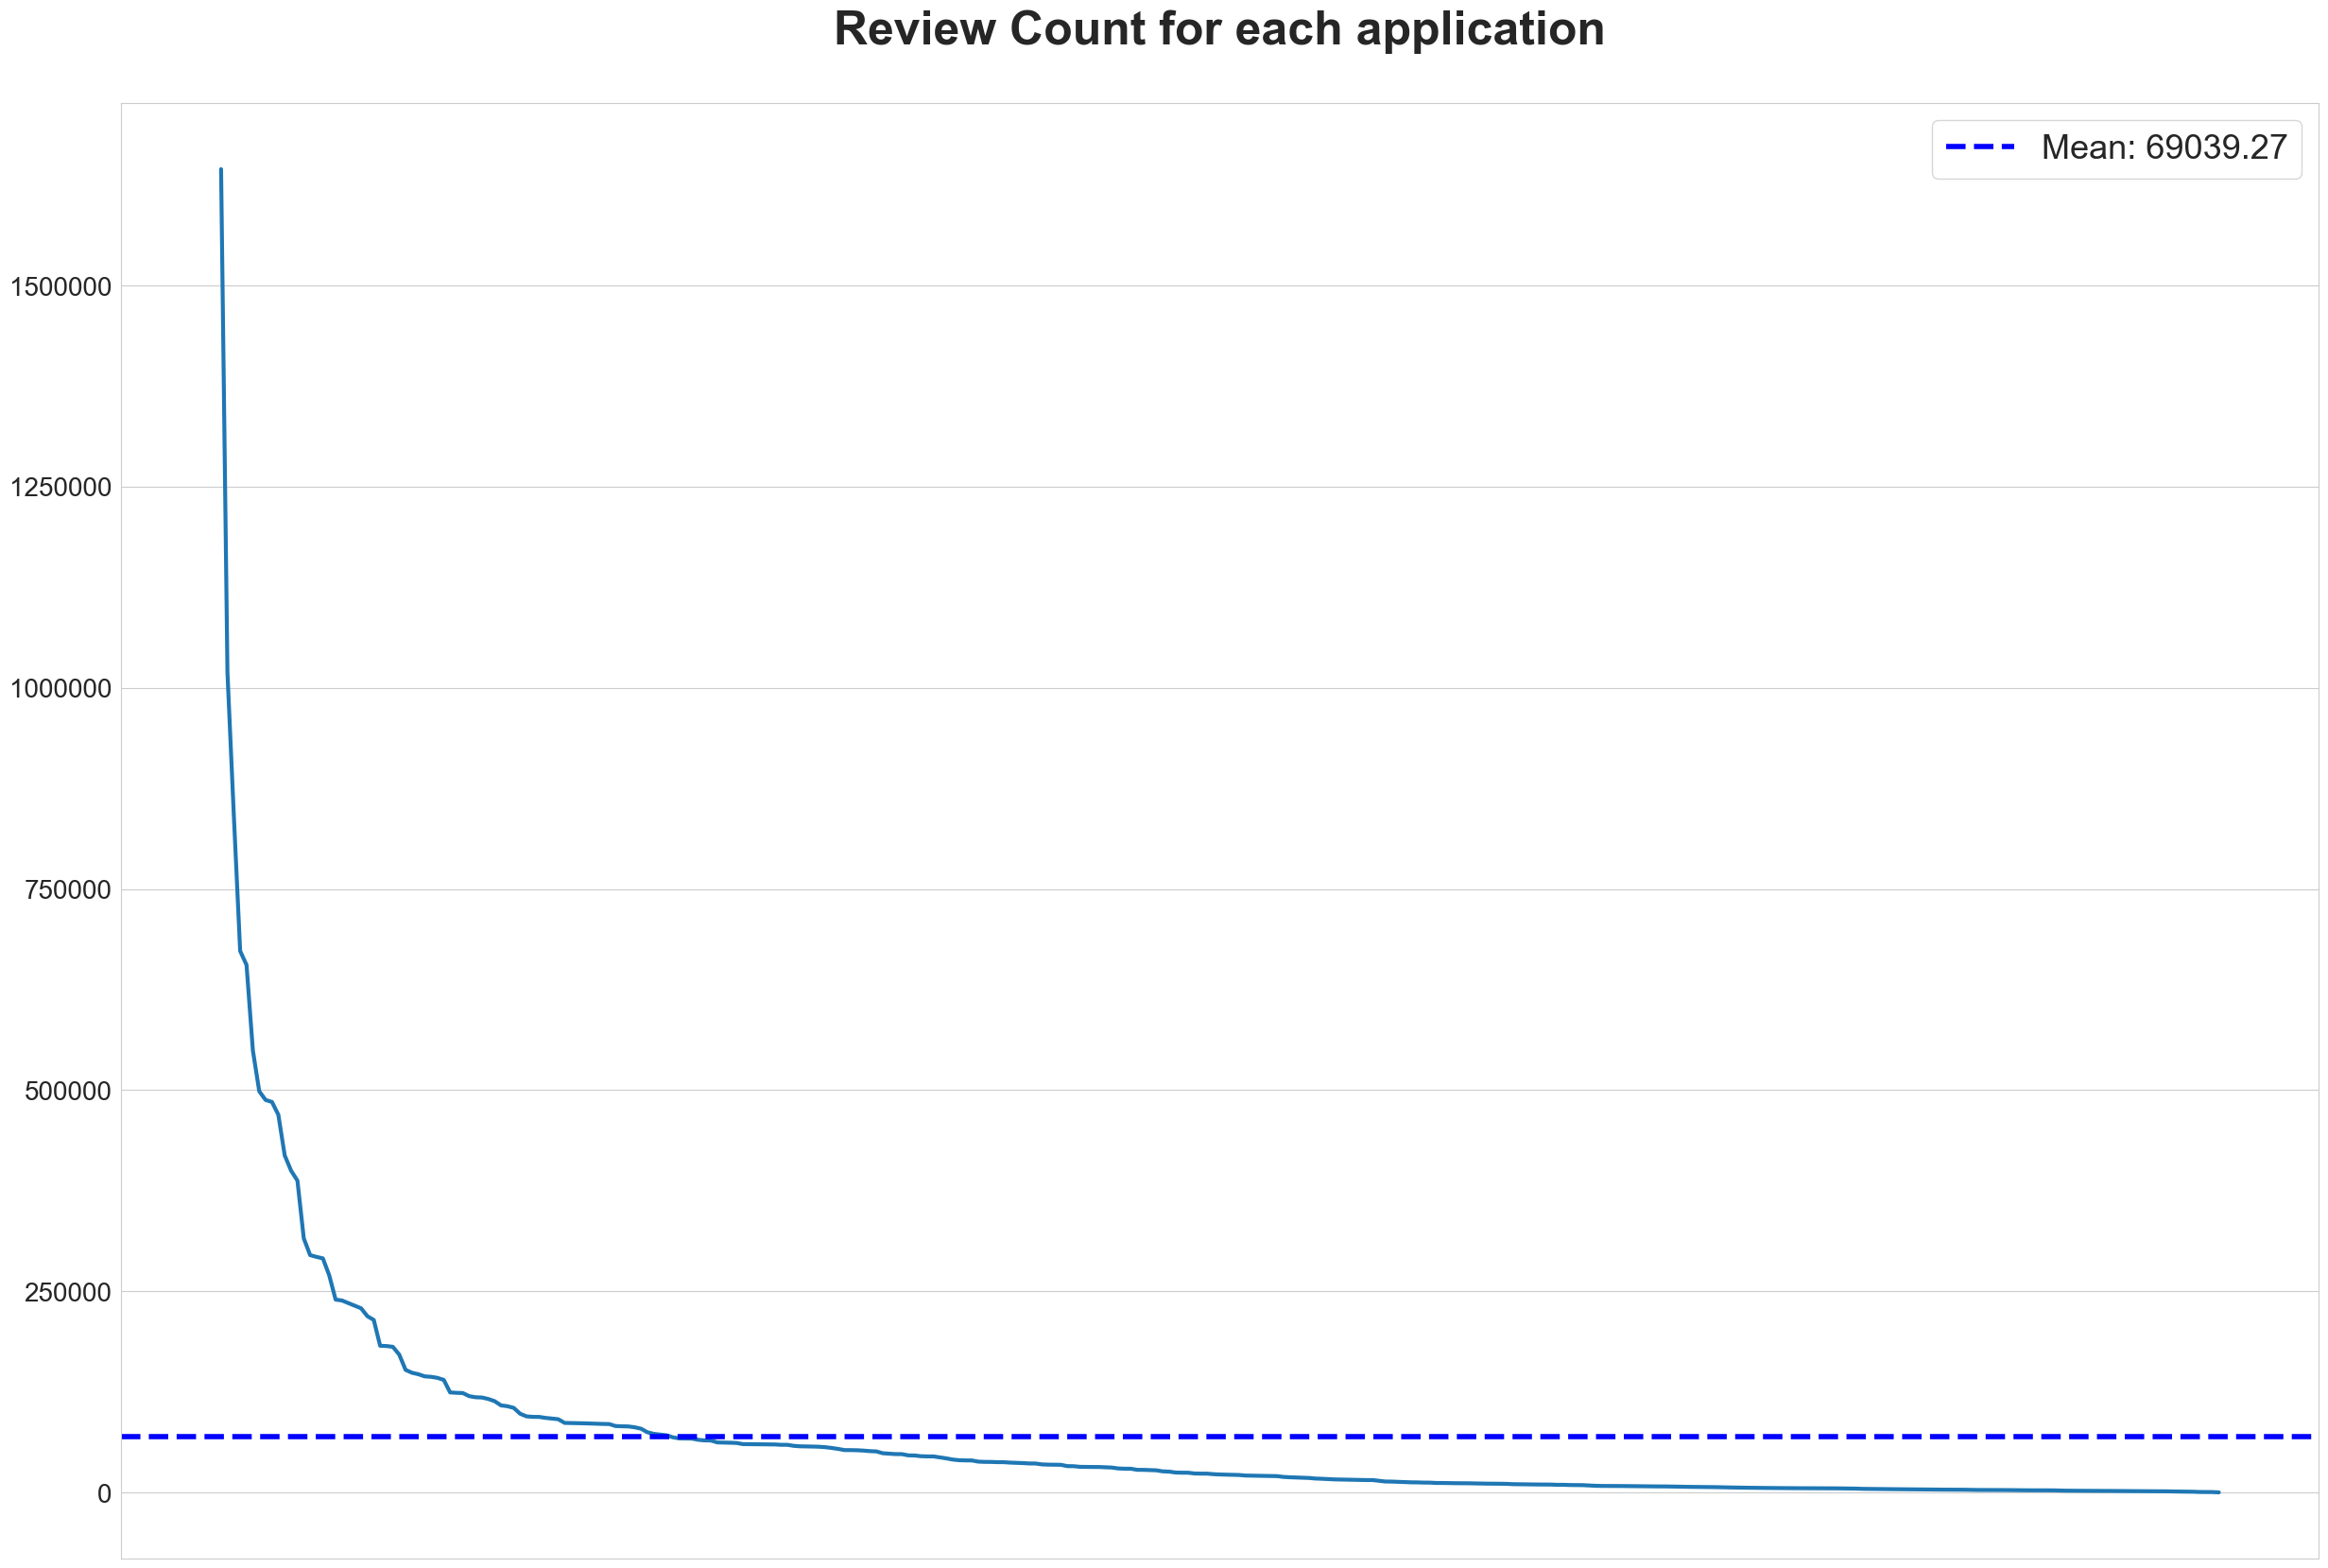

In [29]:
review_count = df['app_name'].value_counts()

plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")
ax = sns.lineplot(
    x=review_count.index, 
    y=review_count.values,
    linewidth = 3
)

# adding the mean value for refereance 
mean_value = np.mean(review_count.values)
plt.axhline(y=mean_value, color='b', lw=4, label=f'Mean: {mean_value:.2f}', linestyle = '--')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both',  labelsize = 20)

#this changes the notation for the numbers on the y axis 
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.xticks([])
ax.set_title('Review Count for each application\n', fontsize = 36, fontweight='bold')
ax.set_xlabel(None)
plt.legend(fontsize=26, loc = 'upper right' )

plt.show()

>If we want to see the name of each app in the plot we could also use this alternative visualization 

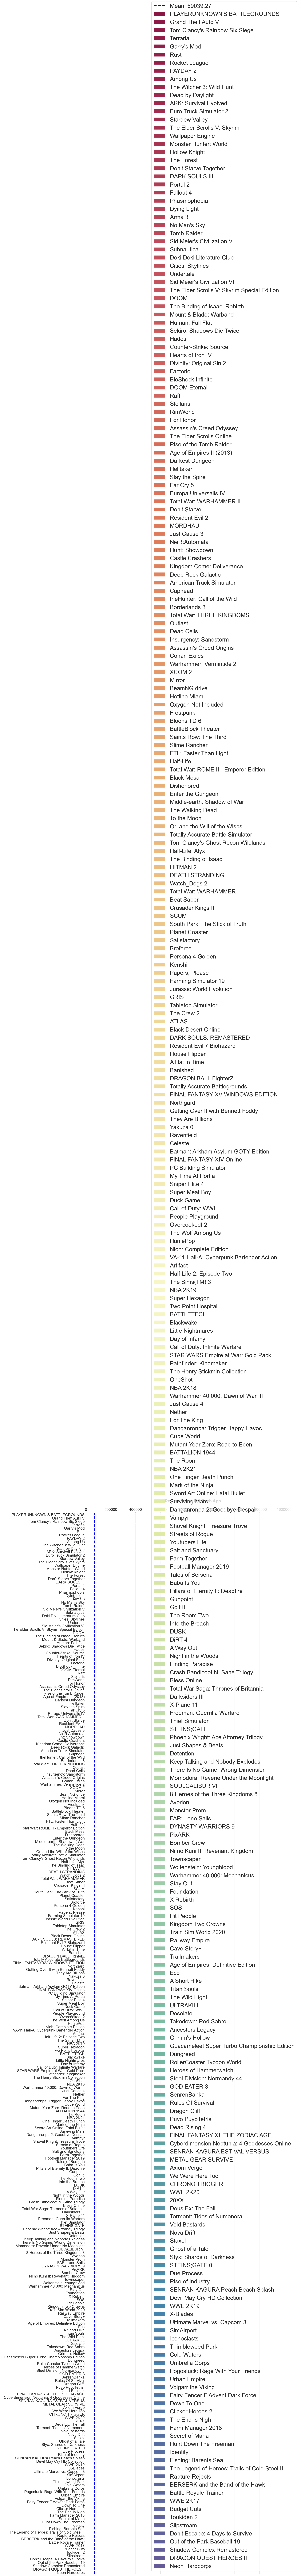

In [30]:
review_count = df['app_name'].value_counts()

plt.figure(figsize=(20, 100))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=review_count.values, 
    y=review_count.index, 
    hue=review_count.index, 
    palette='Spectral',
    orient='h'
)

mean_value = np.mean(review_count.values)
plt.axvline(x=mean_value, color='b', lw=4, label=f'Mean: {mean_value:.2f}', linestyle = '--')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both',  labelsize = 20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.set_title('Review Count For Each App\n', fontsize = 22, fontweight='bold')
ax.set_ylabel(None)
plt.legend(fontsize=30, loc = 'lower right' )

plt.show()




In [31]:
# calculate the percentage of the reviews associated with the top 10 apps for number of reviews
top_10 = review_count.iloc[0:10]
percent_top_10 = f"{sum(top_10.values)/sum(review_count.values):.1%}"
print(f"Percentage of the total reviews, given to the top 10 apps: {percent_top_10}\n")

# difference between first and second app in number of reviews
print(f"Ratio of the number of reviews for the first and second game: {top_10.iloc[0]/top_10.iloc[1]:.1f}\n")

#number of applications under the mean
above_mean = review_count.loc[review_count.values > mean_value].count()
print(f"Number of applications that are over the mean: {above_mean}")

Percentage of the total reviews, given to the top 10 apps: 33.7%

Ratio of the number of reviews for the first and second game: 1.6

Number of applications that are over the mean: 71


>Looking at the plot, most of the apps have a count lower than the average; in fact, only 71 of 315 total apps are above this threshold. The graph is clearly right-skewed and shows that the first 5 to 10 apps have significantly higher review counts than the rest. The top 10 apps by number of reviews alone make up almost 34% of the total reviews. The game called "PLAYERUNKNOWN'S BATTLEGROUNDS" also has a number of reviews 1.6 times than the second application on the list which is a huge difference.

---
## 2.3
### For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.
---


In [32]:
#select the top 5 apps names
top_apps = review_count.index[:5]

#get the rows from the original dataframe corresponding to these names

top_apps_df = df.query('app_name in @top_apps')

# now group by app_names to show all the combinations for the two columns
# steam_purchase and received_for_free
top_apps_df.groupby('app_name')[['steam_purchase','received_for_free']].value_counts()

app_name                        steam_purchase  received_for_free
Garry's Mod                     True            False                 533729
                                False           False                  97030
                                True            True                   17521
                                False           True                    7244
Grand Theft Auto V              True            False                 873339
                                False           False                 107153
                                True            True                   31949
                                False           True                    6675
PLAYERUNKNOWN'S BATTLEGROUNDS   True            False                1329132
                                False           False                 253680
                                True            True                   43589
                                False           True                   17854
Terraria  


>Now, immediately, we can notice something unexpected: the variables **steam_purchase** and **received_for_free** are <u>not mutually exclusive</u>. Also, there are many reviews left by users who neither bought the game on the Steam store nor received it for free.
<br>
Firstly, we could theorize that Steam registers a user (in this dataset) as having bought the game even if they received it for free and then bought an expansion or a DLC. Secondly, it is possible that many reviewers left a recommendation on Steam without owning the game or possibly having bought it on another platform.


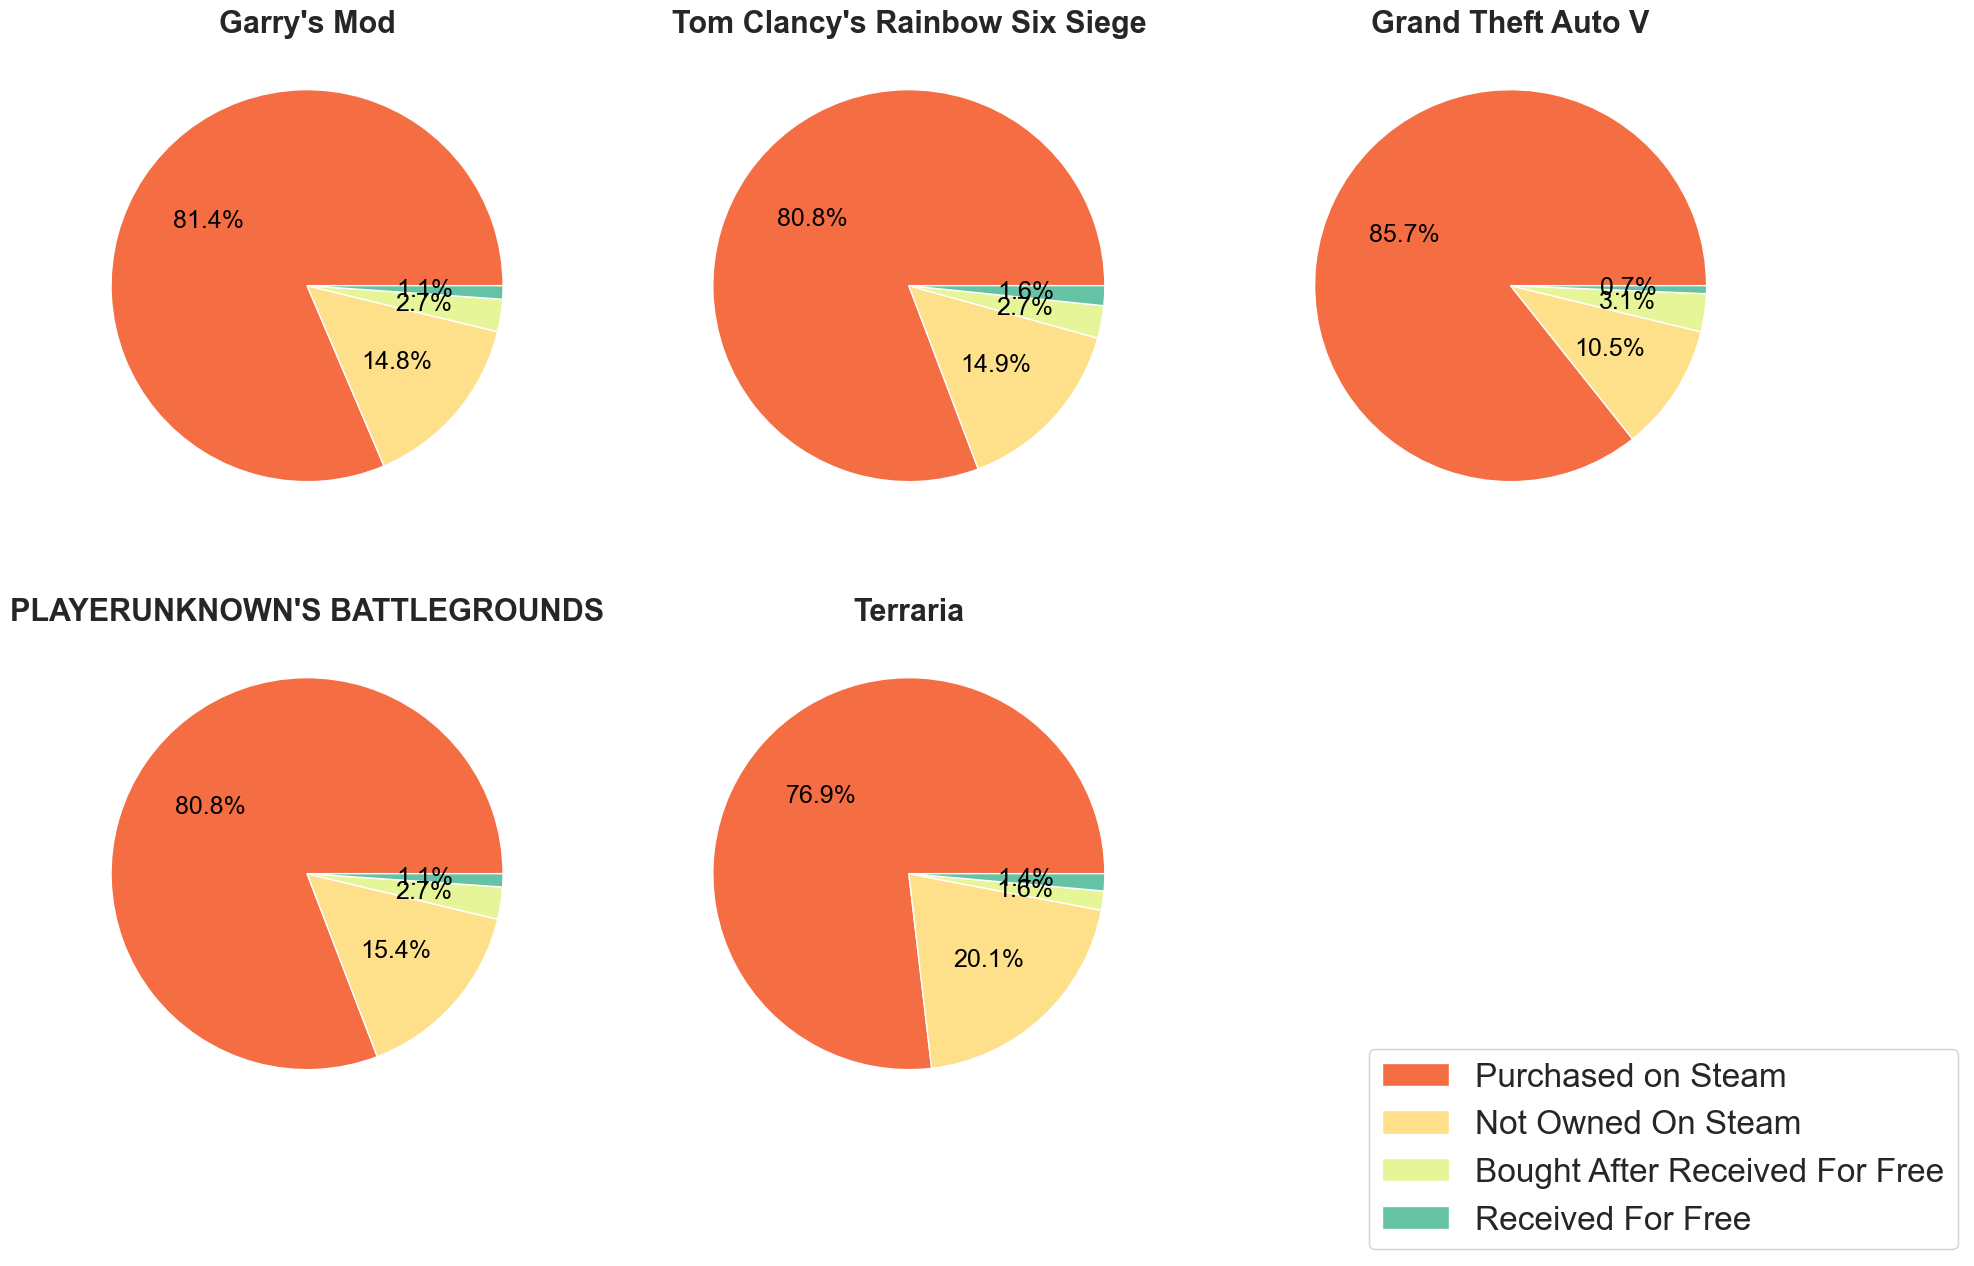

In [33]:
sns.set_style("whitegrid") 

# Firstly, we create a figure with 6 spaces: 2 rows and 3 columns for readability.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(22, 14))
ax = ax.flatten()


purchase_df = top_apps_df.groupby('app_name')[['steam_purchase','received_for_free']].value_counts()

# We create a list with all the labels
lab = ['Purchased on Steam', 'Not Owned On Steam', 'Bought After Received For Free', 'Received For Free']

palette = sns.color_palette("Spectral", 4)


for index, game in enumerate(top_apps_df['app_name'].unique()):
    
    game_data = purchase_df.loc[game]
    count = [i for i in game_data.values]

    #we create the pieplot with the values in purchase_df for each application
    ax[index].pie(count, colors = palette, autopct='%.1f%%', textprops={'fontsize': 18, 'color': 'black'})
    ax[index].set_title(f"{game}",  fontsize=22, fontweight='bold')

fig.delaxes(ax[5]) #we delite one space in the figure as we have only 5 plots

fig.legend(labels = lab, loc='lower right', fontsize = 24, title_fontsize= 16, framealpha = 0.9)

plt.show()



> All the top 5 applications seem to have more or less the same distribution among the 4 highlighted categories. As we can see, the vast majority of reviews come from users who have bought the application on Steam. The second largest group of reviews comes from users who don't own the game on Steam.


---
## 2.4 
### Which applications have the most and the least user recommendations? Summarize your findings.
---


Lets take a look at the top and lower five applications for number of **positive** recommendations.

In [34]:
# subsetting to only rows with variable "recommended" equals true
rec_df = df.loc[df['recommended'] == True]

rec_df['app_name'].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
                                   ...  
Out of the Park Baseball 19          594
Shadow Complex Remastered            587
Identity                             439
DRAGON QUEST HEROES II               423
Neon Hardcorps                        89
Name: app_name, Length: 315, dtype: int64

As could have been expected, the top five games for the number of positive recommendations are the same as the top five for the number of reviews, indicating that the most popular games are also the most frequently reviewed. The same is true for the lowest five applications, which have also remained the same. This could indicate a direct relationship between the number of reviews and the total number of positive recommendations.


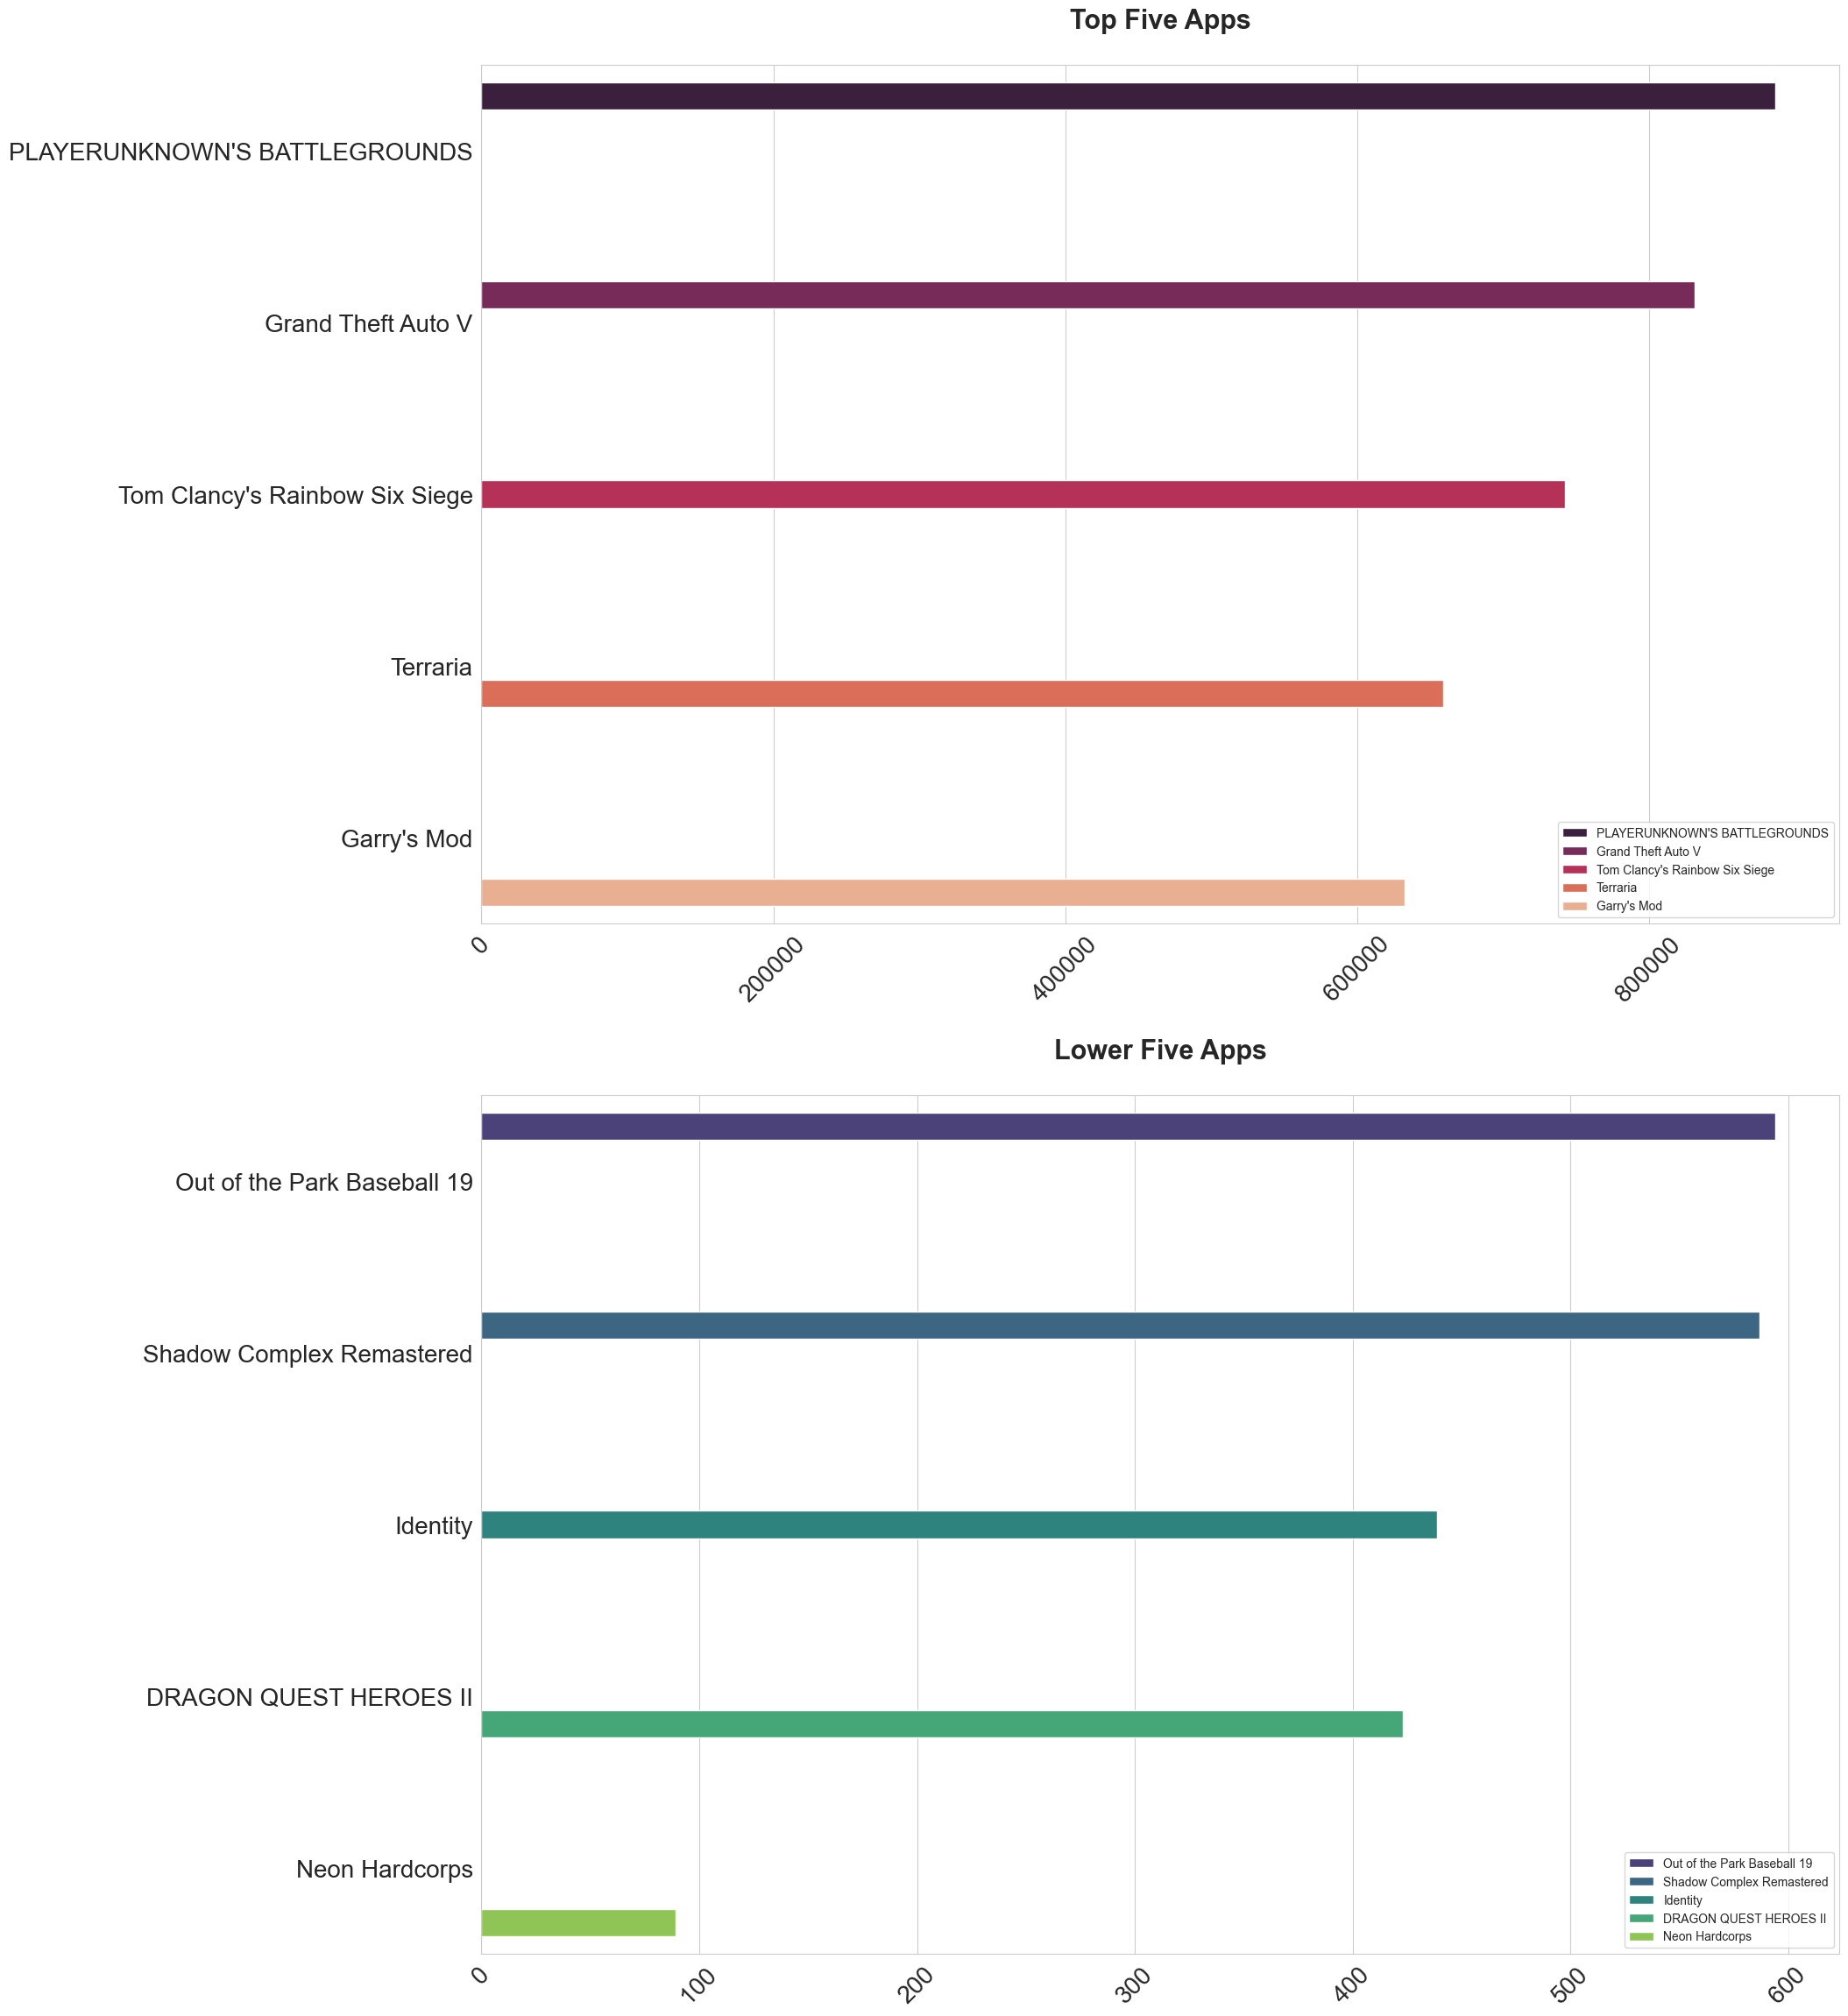

In [35]:
top_5 = rec_df['app_name'].value_counts()[:5]
lower_5 = rec_df['app_name'].value_counts()[-5:]

sns.set_style("whitegrid") 

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 28))


sns.barplot(x = top_5.values, y = top_5.index, ax=  ax[0], hue= top_5.index, palette = 'rocket', orient='h')
ax[0].set_title('Top Five Apps\n', fontsize = 22, fontweight='bold')
ax[0].tick_params(axis='x', rotation =45, labelsize = 20)
ax[0].tick_params(axis='y',  labelsize = 20)
ax[0].set_ylabel(None)


sns.barplot(x = lower_5.values, y = lower_5.index, hue= lower_5.index,ax = ax[1], palette = 'viridis', orient='h')
ax[1].set_title('Lower Five Apps\n', fontsize = 22,fontweight='bold')
ax[1].tick_params(axis= 'x', rotation= 45, labelsize = 20)
ax[1].tick_params(axis='y',  labelsize = 20)
ax[1].set_ylabel(None)

plt.show()


---
## 2.5 

### Is there a correlation between the number of recommendations and the applications' review scores?
---

To answer this we first need to decide how to create the variable "Applications' review scores. Our approach is to calculate the ratio between the number of positive and negatives review for each game, then we can categorise this values into a scale of 1 to 10, with the tenth bin having as an upper limit the highest score in the dataset.

In [36]:
# we already created a df with all the positive reviews: rec_df
# we then only need to get the number of positive recommendations for each app

N_pos = rec_df['app_name'].value_counts()

# we then create the df with the negative reccomendations
rec_neg_df = df.loc[df['recommended'] == False]

N_neg = rec_neg_df['app_name'].value_counts()

# Align N_neg with N_pos by reindexing it to match the order of N_pos so that when merged it won't create errors
N_neg_aligned = N_neg.reindex(N_pos.index)


# Create the merged DataFrame
merged_df = pd.DataFrame({
    'app_name': N_pos.index,  # The index from N_pos (or N_neg after aligning)
    'positive_count': N_pos.values,
    'negative_count': N_neg_aligned.values  # Aligned N_neg values
})


#and we add a new column for the app's scores

merged_df['Ratio'] = merged_df['positive_count'] / merged_df['negative_count']

# we then divide the ratios into 10 bins based on their value
merged_df['Score'] = pd.qcut(merged_df['Ratio'], 10, labels=range(1, 11))

#here the value of 10 corresponds to the bin with maximum value corresponding to the maximum in the column Ratio

# we convert the labels to integers
merged_df['Score'] = merged_df['Score'].astype(int)

# we add a new column with the total number of recommendations
merged_df['Total_Rec'] = merged_df['positive_count'] + merged_df['negative_count']

# We remove the unused columns
merged_df.drop('positive_count', axis = 1, inplace= True)
merged_df.drop('negative_count', axis = 1, inplace= True)
merged_df.drop('Ratio', axis = 1, inplace= True)

merged_df

app_name  Score  Total_Rec
0     PLAYERUNKNOWN'S BATTLEGROUNDS      1    1644255
1                Grand Theft Auto V      3    1019116
2    Tom Clancy's Rainbow Six Siege      5     841918
3                          Terraria     10     672815
4                       Garry's Mod      8     655524
..                              ...    ...        ...
310     Out of the Park Baseball 19      4        700
311       Shadow Complex Remastered      4        700
312                        Identity      1       1804
313          DRAGON QUEST HEROES II      2        600
314                  Neon Hardcorps      1        200

[315 rows x 3 columns]

Now we can analyse the correlation using both a scatterplot and the Pearson correlation coefficient:

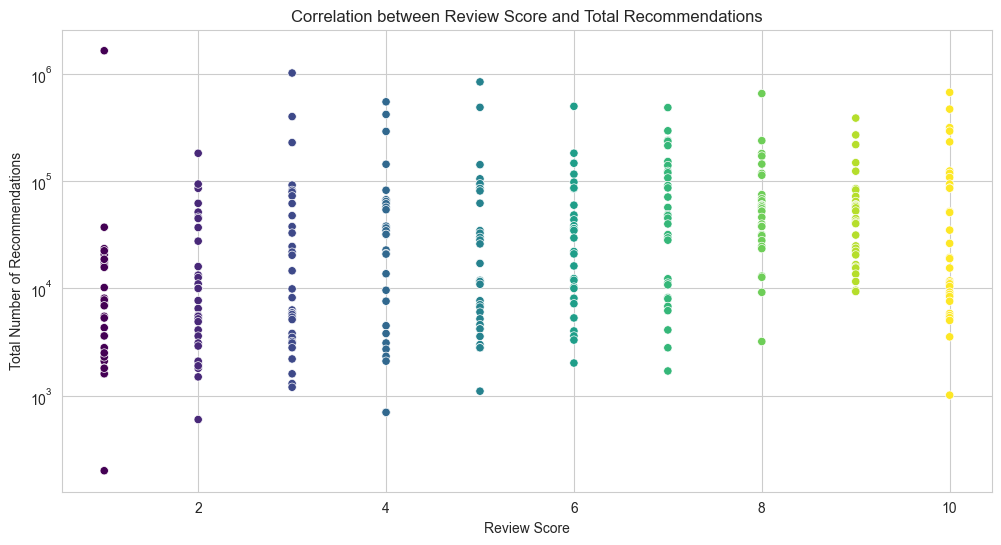

In [37]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='Score', y='Total_Rec', hue='Score', palette='viridis', legend= False)

# Add labels and title
plt.xlabel('Review Score')
plt.ylabel('Total Number of Recommendations')
plt.title('Correlation between Review Score and Total Recommendations')
plt.yscale('log')  # Optional: use a log scale for better visualization if needed

# Show the plot
plt.show()

In [38]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_p = pearsonr(merged_df['Score'], merged_df['Total_Rec'])
print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")



Pearson Correlation Coefficient: 0.080, p-value: 1.591e-01


Looking at this scatterplot and the results of the Pearson Correlation Test, it is evident that there is no clear correlation between the variables. The Pearson Correlation Coefficient is close to zero (0.080), which indicates an absence of a linear relationship. Additionally, the shape of the point cloud in the scatterplot does not suggest any discernible trend or relationship in the data. 

---
# RQ3
---

## Understand Your Data

1. **index** - Unique identifier for each row *(int64)*
2. **app_id** - ID of the app/game *(int64)*
3. **app_name** - Name of the app/game *(string)*
4. **review_id** - Unique ID for each review *(int64)*
5. **language** - Language of the review *(string)*
6. **review** - Content of the review *(string)*
7. **timestamp_created** - Date the review was created in Unix format *(int64)*
8. **timestamp_updated** - Date the review was last updated in Unix format *(int64)* (note: `timestamp_created <= timestamp_updated`)
9. **recommend** - Whether the review recommends the app/game *(bool)*
10. **votes_helpful** - Number of users who found the review helpful *(int64)*
11. **votes_funny** - Number of users who found the review funny *(int64)*
12. **weighted_vote_score** - Helpfulness score of the review *(float64)*
13. **comment_count** - Number of comments on the review *(int64)*
14. **steam_purchase** - Indicates if the user purchased the game on Steam *(bool)*
15. **received_for_free** - Indicates if the user marked they received the app for free *(bool)*
16. **written_during_early_access** - Indicates if the review was posted during the game's Early Access period *(bool)*
17. **author.steamid** - SteamID of the user *(int64)*
18. **author.num_games_owned** - Total games owned by the user *(int64)*
19. **author.num_reviews** - Number of reviews written by the user *(int64)*
20. **author.playtime_forever** - Total playtime tracked in this app *(float64)*
21. **author.playtime_last_two_weeks** - Playtime tracked in the past two weeks for this app *(float64)*
22. **author.playtime_at_review** - Playtime at the time the review was written *(float64)*
23. **author.last_played** - Time when the user last played *(float64)*


### 3.1 Plot the number of reviews submitted each month and describe any trends.

1. **Instruction**: Filter columns **"review_id"** and **"timestamp_created"**.
2. **Transfer**: Convert **"timestamp_created"** to **"month_created"**.
3. **Group By**: Group data by **"month_created"** and count **"review_id"** as **"review_count"**.


In [39]:
#That constants for graphs, I love the interactive ploly library, so I highly recommend running columns to enter on the graph and see the values
month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#bcbd22',
    '#17becf',
    '#e41a1c',
    '#377eb8'
]

In [40]:
# In the task I only need "review_id", "timestamp_created" columns, and timestamp_updated for check how much later they update review
review_time = pd.read_csv(csv_file_path, usecols=["review_id", "timestamp_created", "timestamp_updated"])


In [41]:
review_time = review_time.drop_duplicates(["review_id"])

In [42]:
# transform time to date format
review_time['timestamp_created'] = pd.to_datetime(review_time['timestamp_created'], unit='s')
review_time['timestamp_updated'] = pd.to_datetime(review_time['timestamp_updated'], unit='s')

In [43]:
review_time

review_id   timestamp_created   timestamp_updated
0          85185598 2021-01-23 06:00:29 2021-01-23 06:00:29
1          85185250 2021-01-23 05:50:30 2021-01-23 05:50:30
2          85185111 2021-01-23 05:46:40 2021-01-23 05:46:40
3          85184605 2021-01-23 05:32:50 2021-01-23 05:32:50
4          85184287 2021-01-23 05:23:47 2021-01-23 05:23:47
...             ...                 ...                 ...
21747366   65645125 2020-03-23 18:05:04 2020-03-23 18:05:04
21747367   65645115 2020-03-23 18:04:53 2020-03-23 18:04:53
21747368   65645100 2020-03-23 18:04:33 2020-03-23 18:04:33
21747369   65645066 2020-03-23 18:03:51 2020-04-08 21:47:02
21747370   65644930 2020-03-23 18:01:45 2020-06-13 15:06:40

[21612444 rows x 3 columns]

In [44]:
len(review_time)

21612444

In [45]:
#I created date, date, month, hour, hour_minute for groupby them and count review id, and plot
review_time['date'] = review_time['timestamp_created'].dt.date
review_time['month_created'] = review_time['timestamp_created'].dt.month
review_time['month_updated'] = review_time['timestamp_updated'].dt.month
review_time['day_created'] = review_time['timestamp_created'].dt.day
review_time['hour'] = review_time['timestamp_created'].dt.hour
review_time['hour_minute'] = review_time['timestamp_created'].dt.strftime('%H:%M')


In [46]:
review_time

review_id   timestamp_created   timestamp_updated        date  \
0          85185598 2021-01-23 06:00:29 2021-01-23 06:00:29  2021-01-23   
1          85185250 2021-01-23 05:50:30 2021-01-23 05:50:30  2021-01-23   
2          85185111 2021-01-23 05:46:40 2021-01-23 05:46:40  2021-01-23   
3          85184605 2021-01-23 05:32:50 2021-01-23 05:32:50  2021-01-23   
4          85184287 2021-01-23 05:23:47 2021-01-23 05:23:47  2021-01-23   
...             ...                 ...                 ...         ...   
21747366   65645125 2020-03-23 18:05:04 2020-03-23 18:05:04  2020-03-23   
21747367   65645115 2020-03-23 18:04:53 2020-03-23 18:04:53  2020-03-23   
21747368   65645100 2020-03-23 18:04:33 2020-03-23 18:04:33  2020-03-23   
21747369   65645066 2020-03-23 18:03:51 2020-04-08 21:47:02  2020-03-23   
21747370   65644930 2020-03-23 18:01:45 2020-06-13 15:06:40  2020-03-23   

          month_created  month_updated  day_created  hour hour_minute  
0                     1              1           23     6       06:00  
1                     1              1           23     5       05:50  
2                     1              1           23     5       05:46  
3                     1              1           23     5       05:32  
4                     1              1           23     5       05:23  
...                 ...            ...          ...   ...         ...  
21747366              3              3           23    18       18:05  
21747367              3              3           23    18       18:04  
21747368              3              3           23    18       18:04  
21747369              3              4           23    18       18:03  
21747370              3              6           23    18       18:01  

[21612444 rows x 9 columns]

In [47]:
#count by month
month_review_created_counts = review_time.groupby('month_created').size().reset_index(name='review_count')

month_review_updated_counts = review_time.groupby('month_updated').size().reset_index(name='review_count')

In [48]:
month_review_updated_counts

month_updated  review_count
0               1       2128445
1               2       1298898
2               3       1478793
3               4       1289627
4               5       1273645
5               6       1875693
6               7       1853939
7               8       1226356
8               9       1187271
9              10       1451575
10             11       3945400
11             12       2602802

In [49]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=month_review_created_counts['month_created'],
    y=month_review_created_counts['review_count'],
    mode='lines+markers',
    name='Reviews Created'
))

fig.add_trace(go.Scatter(
    x=month_review_updated_counts['month_updated'],
    y=month_review_updated_counts['review_count'],
    mode='lines+markers',
    name='Reviews Updated'
))

fig.update_layout(
    title="Number of Reviews Created and Updated Each Month",
    xaxis_title="Month",
    yaxis_title="Review Count"
)
fig.update_yaxes(tickformat=",.0f")

fig.show()


As we can see, the number of reviews created and the number of updated reviews per month should be almost the same, since users write one review and do not update it, or update it, but within a month.
The peak season turned out to be November, due to most holidays.



### 3.2 Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.




In [50]:
# I sorted by the biggest review count, and we can idetnify top 3 and lest 3 month
month_review_created_counts = month_review_created_counts.sort_values(by="review_count", ascending=False)
month_review_created_counts

month_created  review_count
10             11       3736292
11             12       2568178
0               1       2117512
5               6       1923560
6               7       1881550
2               3       1512060
9              10       1476071
1               2       1330603
3               4       1310124
4               5       1290852
7               8       1259053
8               9       1206589

The most reviews are left in November top 1, December top 2, and January top 3.
Least in May, August, and least in September.

This is logical since in November there are big promotions like Black Friday, then in December there is a new year. And reviews are left not immediately after the purchase, but even after it has been completed.

In other months, the number of reviews created is lower, due to logical factors such as starting school/university


### 3.3 Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.





In [51]:
# I want to find dates have the biggest review counts in all dataset
daily_review_counts = review_time.groupby('date').size().reset_index(name='review_count')

In [52]:
daily_review_counts

date  review_count
0     2010-11-19            17
1     2010-11-20            68
2     2010-11-21            56
3     2010-11-22            43
4     2010-11-23            13
...          ...           ...
3714  2021-01-19         20140
3715  2021-01-20         19837
3716  2021-01-21         18888
3717  2021-01-22         19174
3718  2021-01-23         14232

[3719 rows x 2 columns]

In [53]:
daily_review_counts.sort_values(by="review_count", ascending=False)

date  review_count
3144  2019-06-29        226053
2925  2018-11-22        154397
3145  2019-06-30        149808
3660  2020-11-26        138220
2561  2017-11-23        134701
...          ...           ...
133   2011-04-01            11
63    2011-01-21            11
131   2011-03-30            10
1433  2014-10-22             6
85    2011-02-12             6

[3719 rows x 2 columns]

In [54]:
# I grioupby month_creared and day_created for plot
date_review_counts = review_time.groupby(["month_created", "day_created"]).size().reset_index(name='review_count')
date_review_counts


month_created  day_created  review_count
0                1            1        105491
1                1            2        113206
2                1            3        104530
3                1            4         99513
4                1            5         93026
..             ...          ...           ...
361             12           27        118997
362             12           28        117622
363             12           29        113821
364             12           30        111612
365             12           31        104140

[366 rows x 3 columns]

In [55]:


fig = go.Figure()

for i, month in enumerate(sorted(date_review_counts['month_created'].unique())):
    monthly_data = date_review_counts[date_review_counts['month_created'] == month]
    fig.add_trace(
        go.Scatter(
            x=monthly_data['day_created'],
            y=monthly_data['review_count'],
            mode='lines+markers',
            name=month_names[month],
            line=dict(color=colors[i % len(colors)])  # назначение цвета
        )
    )

fig.update_layout(
    title="Daily Review Counts for Each Month",
    xaxis_title="Day of the Month",
    yaxis_title="Review Count",
    legend_title="Month",
)

fig.update_yaxes(tickformat=",.0f")

fig.show()

Based on the graph, it was clear that November had the most reviews, but here it is shown by day, and is visible from the 21st to the 30th of the months November (huge growth), and June, December.

 ### 3.4 What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.

In [56]:
#I used mode in column hour_minute for identify the most frequent number
most_common_time = review_time['hour_minute'].mode()
most_common_time

0    14:50
Name: hour_minute, dtype: object

In [57]:
time_review_counts = review_time.groupby(["hour_minute"]).size().reset_index(name='review_count')

In [58]:
time_review_counts.sort_values(by="review_count", ascending=False)

hour_minute  review_count
890       14:50         19362
905       15:05         19255
877       14:37         19158
904       15:04         19124
922       15:22         19114
..          ...           ...
354       05:54         11665
364       06:04         11658
351       05:51         11646
362       06:02         11599
380       06:20         11573

[1440 rows x 2 columns]

In [59]:


time_review_counts = time_review_counts.sort_values(by='hour_minute')

fig = px.line(time_review_counts, x="hour_minute", y="review_count",
              title="Review Counts by Time of Day",
              labels={"hour_minute": "Time (Hour:Minute)", "review_count": "Review Count"},
              markers=True)

fig.update_xaxes(tickangle=45, title_text="Time (Hour:Minute)")
fig.update_yaxes(title_text="Review Count")
fig.show()


Based in graph we see peak in 14.50 - 19.362k , and second peak in 18.29 - 18.719k. This suggests that users are more likely to write reviews later in the day, potentially after work or school hours.

### 3.5 Create a function that accepts a list of time intervals and plots the number of reviews for each interval.
Use the function to plot the number of reviews for the following time intervals:


| Initial Time | Final Time |
|--------------|------------|
| 00:00:00     | 02:59:59   |
| 03:00:00     | 05:59:59   |
| 06:00:00     | 10:59:59   |
| 11:00:00     | 13:59:59   |
| 14:00:00     | 16:59:59   |
| 17:00:00     | 19:59:59   |
| 20:00:00     | 23:59:59   |



In [60]:
def plot_reviews_interval(data: pd.DataFrame, intervals: List[Tuple[int, int]]) -> None:
    df = data.copy()

    df['hour_minute'] = df['timestamp_created'].dt.strftime('%H:%M')
    df = df.groupby(["hour_minute"]).size().reset_index(name='review_count')
    df['hour'] = pd.to_datetime(df['hour_minute'], format='%H:%M').dt.hour

    review_counts = []

    for l, r in intervals:
        el = df[(l <= df['hour']) & (df['hour'] < r)]['review_count'].sum()
        review_counts.append(el)
        print(f"Interval {l}:00 - {r}:00: {el} reviews")

    interval_labels = []
    for l, r in intervals:
        interval_labels.append(f"{l}:00-{r}:00")

    fig = go.Figure(data=[
        go.Bar(x=interval_labels, y=review_counts, marker_color='blue')
    ])

    fig.update_layout(
        title="Distribution of Number of Reviews by Time Interval",
        xaxis_title="Time Intervals",
        yaxis_title="Number of Reviews",
        xaxis=dict(tickangle=45),
        template="plotly_white"
    )

    fig.show()



### 3.6 Use the function to plot the number of reviews for the following time intervals:


In [61]:
intervals = [(0, 3), (3, 6), (6, 11), (11, 14), (14, 17), (17, 20), (20, 24)]

plot_reviews_interval(review_time, intervals)

Interval 0:00 - 3:00: 2335439 reviews
Interval 3:00 - 6:00: 2229365 reviews
Interval 6:00 - 11:00: 3900410 reviews
Interval 11:00 - 14:00: 2953885 reviews
Interval 14:00 - 17:00: 3356977 reviews
Interval 17:00 - 20:00: 3239974 reviews
Interval 20:00 - 24:00: 3596394 reviews


### 3.7 Summarize your findings from the time interval analysis.


Peak period (06:00 - 11:00): The highest number of reviews occurs between 06:00 and 11:00, with approximately 3.9 million reviews. It means users write reviews in morning because the tryed to play game in night

Evening activity (20:00 - 00:00): The next highest number is observed between 20:00 and 00:00, with about 3.6 million reviews. This means in evening users have more time for wirte reviews

Fewer reviews late at night and early in the morning: the lowest number of reviews occur in the intervals from 00:00 to 03:00 and from 03:00 to 06:00 (about 2.2–2.3 million). Becuse people sleep in this time.
In conclusion we know peaks and we can send notifications and send newsletters and interact with users, to reach more people and keep them

















---
## RQ4

### Investigating whether users who spend more time using an application give higher or lower ratings.
---
## 4.1
### Analyze the relationship between the amount of time a user has spent on an application and their review score.
### Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.
---

In [62]:
df = df = pd.read_csv(csv_file_path, usecols = ['app_name','weighted_vote_score',
                                                 'author.num_games_owned', 'author.num_reviews',
                                                'author.last_played', 'author.playtime_at_review', 
                                                'author.playtime_forever', 'recommended'])

first let's clean the data

In [63]:
#let's search for any missing data points
df.isna().sum()


app_name                         0
recommended                      0
weighted_vote_score              0
author.num_games_owned           0
author.num_reviews               0
author.playtime_forever          2
author.playtime_at_review    25682
author.last_played               2
dtype: int64

There are many missing datapoints in the columns we need to work with, so we will delete all the rows corresponding to them.

In [64]:
# we drop all the rows where those specyfic columns have missing values
df = df.dropna(subset=['author.playtime_forever','author.playtime_at_review','author.last_played'])
df.isna().sum()

app_name                     0
recommended                  0
weighted_vote_score          0
author.num_games_owned       0
author.num_reviews           0
author.playtime_forever      0
author.playtime_at_review    0
author.last_played           0
dtype: int64

We will also now get rid of any outliers by only taking the datapoints under the 99% quantile for **author.playtime_at_review**

In [65]:
q_99 = df['author.playtime_at_review'].quantile(0.99)

df = df.loc[df['author.playtime_at_review']<= q_99]

In [66]:
# First we will make the timestamps readable
df['author.playtime_forever'] = (df['author.playtime_forever'] / 60).round().astype(int)

df['author.playtime_at_review'] = (df['author.playtime_at_review'] / 60).round().astype(int)

# This column need to be converted to readable dates from unix timestamps 
df['author.last_played'] = pd.to_datetime(df['author.last_played'], unit='s')

df[['author.playtime_forever','author.playtime_at_review','author.last_played']].head()

author.playtime_forever  author.playtime_at_review  author.last_played
0                       32                         32 2021-01-22 19:23:03
1                       46                         45 2021-01-23 07:18:27
2                       18                         18 2021-01-23 06:36:17
3                       93                         92 2021-01-23 06:35:44
4                        4                          4 2021-01-16 09:10:49

As already discussed for RQ2 Steam does not have an application score system, the games can only be recommended or not by the users of the platform. For this reason there is no real way to define a Higher and Lower score given by the single user. It was possible to create a metric that game a score the the game, based on the recommendation column of this dataset, but this variable would be the same for each row in the dataset corresponding to the game and so useless for the kind of analysis required here.

So for the first part we will analyse if users who had spent more time using the application at the time of the review, left a positive or negative recommendation. We will do this by splitting the users in two groups using the median of the variable **author.playtime_at_review** and then check what are the ratios between positive and negative reviews. 

In [67]:
# take the median
median_T = df['author.playtime_at_review'].quantile(0.50)

group_under = df.loc[df['author.playtime_at_review'] <= median_T]
group_above = df.loc[df['author.playtime_at_review'] > median_T]

#the two groups should have more or less the same numerosity
print('let\' check the numerosity of the two groups (they should be more or less equal\n')
print(f"N. Group #1: {len(group_under)}\n")
print(f"N. Group #2: {len(group_above)}")

let' check the numerosity of the two groups (they should be more or less equal

N. Group #1: 10884117

N. Group #2: 10620356


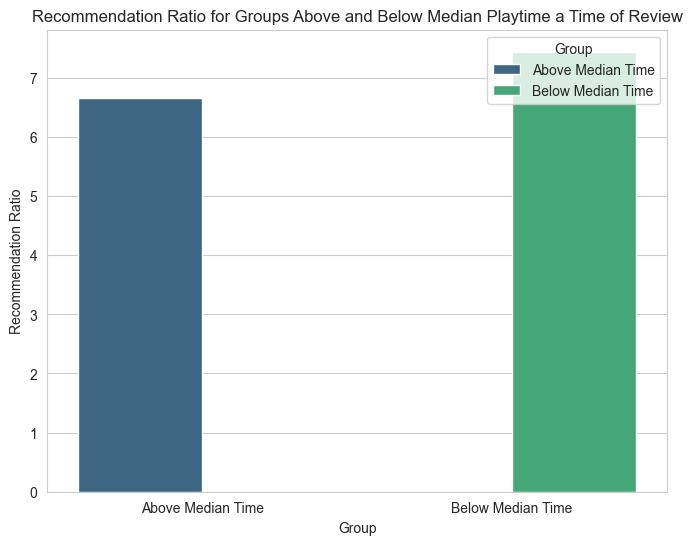

Group #1 Ratio: 6.651222569629555

Group #2 Ratio: 7.441016664701977



In [68]:
#Let's now take the ratios of the positive and negative recommendations for the two groups and then plot them.
group_above_ratio = group_above['recommended'].loc[group_above['recommended'] == True].count() / group_above['recommended'].loc[group_above['recommended'] == False].count()


group_under_ratio = group_under['recommended'].loc[group_under['recommended'] == True].count() / group_under['recommended'].loc[group_under['recommended'] == False].count()

# let's create a new df to plot 

ratio_df = pd.DataFrame({
    'Group': ['Above Median Time', 'Below Median Time'],
    'Recommendation Ratio': [group_above_ratio, group_under_ratio]
})

# Plot using the dataframe we created
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Recommendation Ratio', data=ratio_df, palette='viridis', hue = 'Group')
plt.title('Recommendation Ratio for Groups Above and Below Median Playtime a Time of Review')
plt.ylabel('Recommendation Ratio')
plt.xlabel('Group')

plt.show()

print(f'Group #1 Ratio: {group_above_ratio}\n')
print(f'Group #2 Ratio: {group_under_ratio}\n')

Analysing these results we can see that users who had played less time tend to give slightly more positive reviews in ratio to negative, than those users who had spent more time playing before reviewing the game, this could be to the natural enjoinment that comes from playing something new for the first time.

---
## 4.2
### Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.
---

As already said before, it is not possible to create a new variable 'app review score' related to each user. What we can instead take a look at is the relationship between the single review's weighted score (provided in the dataframe column **weighted_vote_score**) and the time the user spent playing before leaving the review.

We will also take a look at how much more time users who left positive recommendations then played the game on Steam.

Now we plot again without the outliers


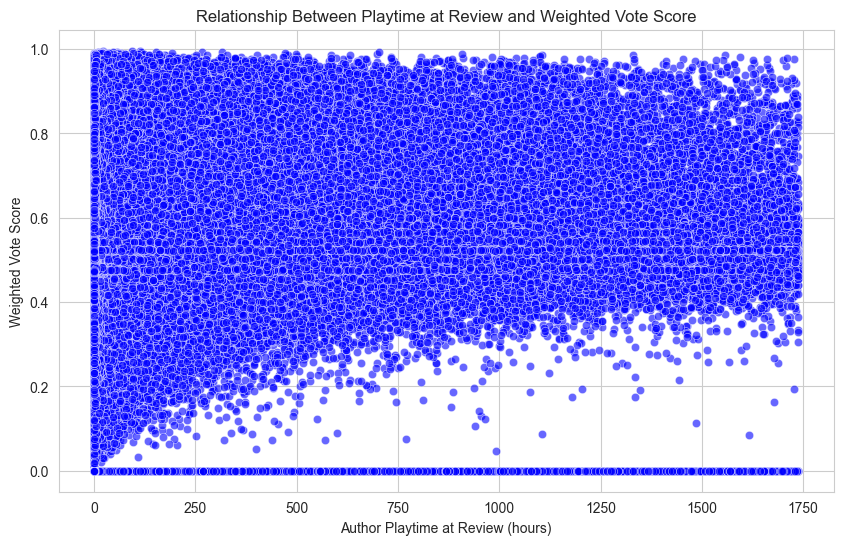

In [69]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='author.playtime_at_review', y='weighted_vote_score', data=df, alpha=0.6, color='blue')

# Customize the plot
plt.title('Relationship Between Playtime at Review and Weighted Vote Score')
plt.xlabel('Author Playtime at Review (hours)')
plt.ylabel('Weighted Vote Score')
plt.grid(True)

# Show the plot
plt.show()


Due to the very large number of rows this graph does not provide a very clear image of any relations present between these two variables. So now we will split the data into groups using the variable playtime and see the percentage of those reviewers in the groups got a higher weighted vote score than 0.5.

In [70]:
# We divide the rows into 6 groups based on 'author.playtime_at_review' using pd.qcut, that divides the data using the number of quantiles specified
df['time_group'] = pd.qcut(df['author.playtime_at_review'], 6, labels=[f'Group {i+1}' for i in range(6)])

print(f"new group column and playtime columns:\n {df[['time_group','author.playtime_at_review']]}")


# then alculate the numbe and proportion of rows in each group with weighted_vote_score >= 0.5
# we then store these results in a new df
group_summary = df.groupby('time_group')['weighted_vote_score'].apply(lambda x: (x >= 0.5).sum()).reset_index() #reset_index() is needed to construnct the new columns later 
#we rename the columns for easier plotting
group_summary.columns = ['time_group', 'count_above_0.5']


# Add the total number of users in each group to calculate proportions
group_summary['total_count'] = df['time_group'].value_counts().sort_index().values # we simply count the occurrencies of each group in the previuus dataframe
group_summary['proportion_above_0.5'] = group_summary['count_above_0.5'] / group_summary['total_count'] # we calculate the percentages

# Display the group summary
print(group_summary)

new group column and playtime columns:
          time_group  author.playtime_at_review
0           Group 4                         32
1           Group 4                         45
2           Group 3                         18
3           Group 5                         92
4           Group 1                          4
...             ...                        ...
21747366    Group 1                          0
21747367    Group 1                          0
21747368    Group 1                          1
21747369    Group 1                          0
21747370    Group 1                          0

[21504473 rows x 2 columns]
  time_group  count_above_0.5  total_count  proportion_above_0.5
0    Group 1           725217      3590982                 0.202
1    Group 2           762866      3794865                 0.201
2    Group 3           754476      3498270                 0.216
3    Group 4           768016      3455419                 0.222
4    Group 5           840534      3593676

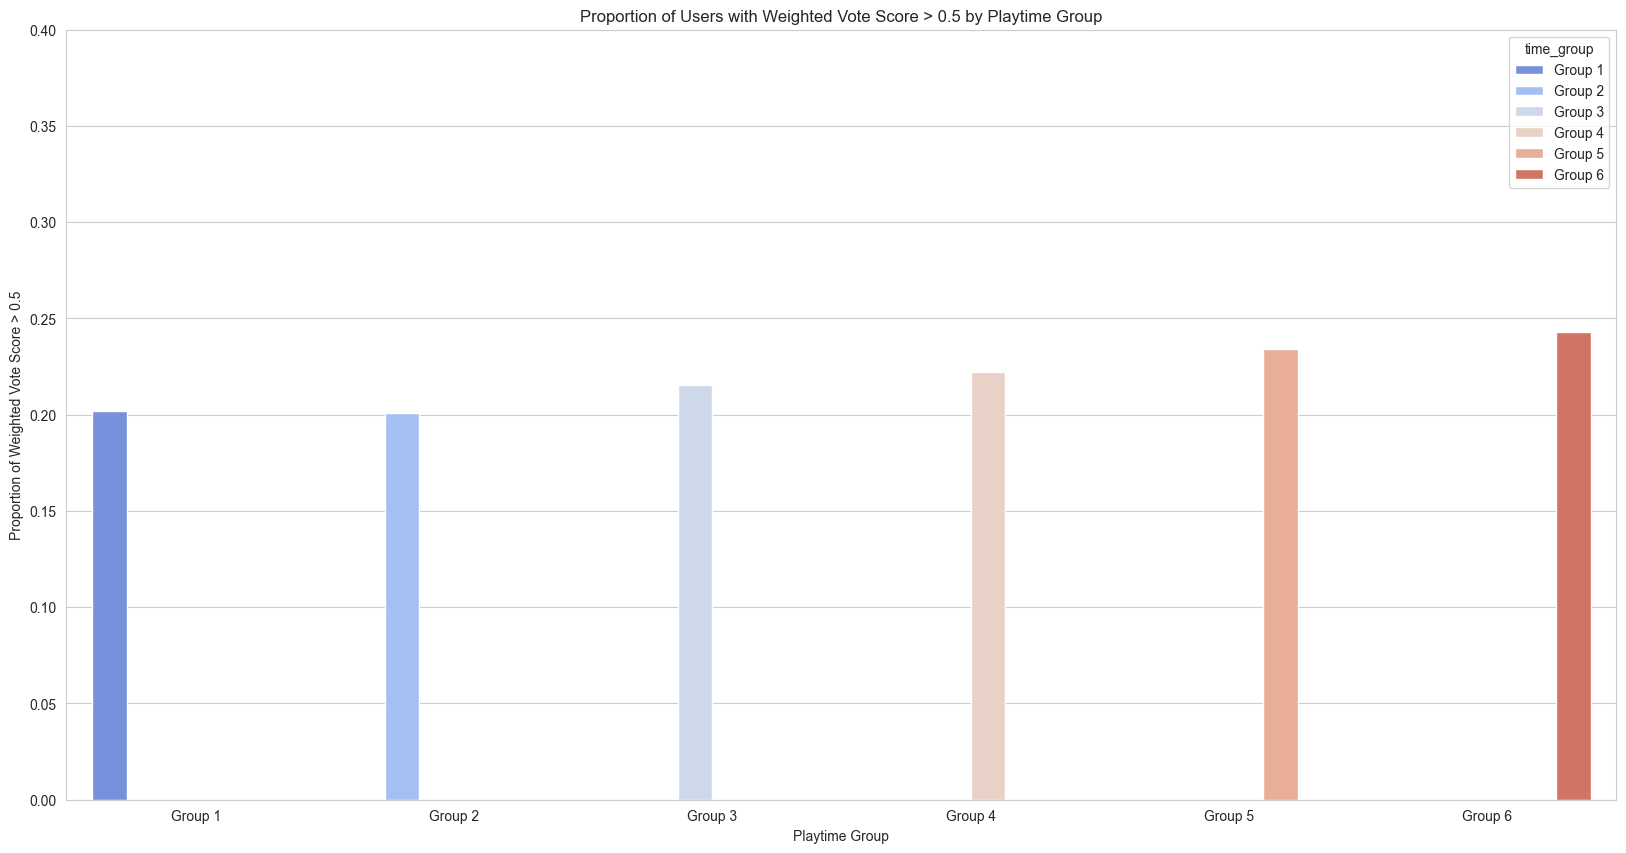

In [71]:
# Plot the proportions
plt.figure(figsize=(20, 10))
sns.barplot(x='time_group', y='proportion_above_0.5', data=group_summary, palette='coolwarm', hue= 'time_group')
plt.title('Proportion of Users with Weighted Vote Score > 0.5 by Playtime Group')
plt.xlabel('Playtime Group')
plt.ylabel('Proportion of Weighted Vote Score > 0.5')
plt.ylim(0, 0.4) #we changes the ylim to make the plot more readable
plt.show()


This graph seems to show a slight positive correlation between number of hours spent playing before leaving a review and the "weighted helpful score" the review received. We will now use the ANOVA test (which stends for Analysis of Variance) to see if there are any significant differences between the means of the 6 groups. What this test does is calculate the variance of each group for the dependent variable (weighted score of the review) and compare the variance within each group to the overall variance of the group means Theoretically the groups should be made from different unrelated samples, but we will assume that the ones we created are.


In [72]:
import scipy.stats as stats
# we will test for significance using ANOVA (as weighted_vote_score is assumed continuous)
anova_result = stats.f_oneway(
    *[df.loc[df['time_group'] == group, 'weighted_vote_score'] for group in df['time_group'].unique()]
)

print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4e}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("There is a statistically significant relationship between author.playtime_at_review and weighted_vote_score.")
else:
    print("There is no statistically significant relationship between author.playtime_at_review and weighted_vote_score.")


ANOVA Test Result:
F-statistic: 3886.9891, p-value: 0.0000e+00
There is a statistically significant relationship between author.playtime_at_review and weighted_vote_score.


---
## 4.3
### Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?
---

We gave our results to ChatGPT with the prompt: "comment on this work: can you interpret the statistical results in this notebook? can you provide anymore factors that could explain why users who spend more time on the app give higher or lower ratings?".
This is the answer we received:

### Interpretation of the Statistical Results:

In the provided work:

1. **ANOVA Test Results**:
   - **F-statistic**: The ANOVA test yielded a significant F-statistic, and the p-value was extremely low (close to 0), indicating strong evidence against the null hypothesis. This suggests that there are significant differences in `weighted_vote_score` means across the five `author.playtime_at_review` groups.
   - **Conclusion**: Since the p-value is much lower than the standard significance level (0.05), we can conclude that there is a statistically significant relationship between `author.playtime_at_review` and `weighted_vote_score`. This implies that the amount of time users spend on the app before reviewing it affects their ratings in a meaningful way.

### Additional Factors That Could Explain User Ratings:

1. **User Engagement and Familiarity**:
   - **More Playtime, Higher Familiarity**: Users who spend more time on an application might become more familiar with its features, mechanics, and overall experience. This can lead to more informed reviews, potentially more positive if they enjoy it or negative if issues are found with extensive use.
   - **Initial Enthusiasm vs. Long-term Experience**: Users might rate highly in the beginning due to novelty, but their perception may change after prolonged exposure, affecting their final review.

2. **User Expectations and Game/Software Complexity**:
   - **Complexity of the Application**: Applications or games with deeper content, requiring more time to fully experience, may influence the review score as users invest more time to grasp its full potential.
   - **Expectation Bias**: Users who expect a certain quality or gameplay experience might adjust their ratings based on how well their expectations are met over time.

3. **Community Influence and Trends**:
   - **Social Influence**: Users who interact with community forums, reviews, or discussions may develop biases or preferences that affect their ratings.
   - **Trends and Events**: Updates, special events, or community-generated content can boost or drop user satisfaction over time.

4. **User Skill Level**:
   - **Veteran vs. New Users**: Users who are experienced and have spent more time with the app might give different ratings compared to newcomers, as veterans may be more critical or have a higher standard.
   - **Learning Curve**: Applications or games that require time to master might lead to higher ratings from users who invest the time to overcome the learning curve.

5. **Review Timing**:
   - **Recency Bias**: A user who recently experienced a positive or negative aspect might reflect that in their review, depending on how soon they wrote it after playing.
   - **Updates or Changes**: Applications that frequently update can have varying ratings based on how well those changes are perceived by users.

### Potential Improvements or Additional Analysis:
- **Sentiment Analysis**: Analyzing user review text alongside quantitative ratings can provide more context about why scores are given.
- **Regression Analysis**: Instead of just group comparisons, performing regression analysis with `author.playtime_at_review` as a continuous variable can provide deeper insights into the nature of the relationship (e.g., linear or non-linear).
- **Interaction Terms**: Exploring if there are interaction effects between `author.playtime_at_review` and other variables (such as `author.num_reviews` or `author.num_games_owned`) could highlight deeper user behavior trends.
- **Cohort Analysis**: Breaking down the data by cohorts based on user demographics or other attributes can reveal if certain groups behave differently in their rating trends.

These factors can complement the existing work and potentially explain why users who spend more or less time using an application give higher or lower ratings.

### We could implement the regression analysis as suggested

In [73]:
import statsmodels.api as sm

# create the dependent and independent variables
X = df['author.playtime_at_review']  # Independent variable
y = df['weighted_vote_score']        # Dependent variable

# Add a constant to the independent variable for the regression intercept
X = sm.add_constant(X)

# create the regression model using sm
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     weighted_vote_score   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     161.1
Date:                 Sun, 03 Nov 2024   Prob (F-statistic):           6.39e-37
Time:                         14:05:45   Log-Likelihood:            -1.1186e+05
No. Observations:             21504473   AIC:                         2.237e+05
Df Residuals:                 21504471   BIC:                         2.238e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

This regressions comes to a different conclusion than our previous analysis, as we can see the R-squared value is equal to 0 and so it indicates that almost none of the variability of **weighted_vote_score** is explained by **author.playtime_at_review**.
These results are also more comparable with the scatterplot we initially created.

---
# RQ5
---
It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently

### 5.1 Determine the ten reviewers with the highest number of reviews in the dataset.


In [74]:
users_reviews = pd.read_csv(csv_file_path,
                            usecols=["app_id", "app_name", "review_id", "language", "votes_helpful", "author.steamid"])

In [75]:
users_reviews

app_id                  app_name  review_id  language  \
0         292030  The Witcher 3: Wild Hunt   85185598  schinese   
1         292030  The Witcher 3: Wild Hunt   85185250  schinese   
2         292030  The Witcher 3: Wild Hunt   85185111  schinese   
3         292030  The Witcher 3: Wild Hunt   85184605   english   
4         292030  The Witcher 3: Wild Hunt   85184287  schinese   
...          ...                       ...        ...       ...   
21747366  546560           Half-Life: Alyx   65645125   english   
21747367  546560           Half-Life: Alyx   65645115   english   
21747368  546560           Half-Life: Alyx   65645100   english   
21747369  546560           Half-Life: Alyx   65645066   english   
21747370  546560           Half-Life: Alyx   65644930  schinese   

          votes_helpful     author.steamid  
0                     0  76561199095369542  
1                     0  76561198949504115  
2                     0  76561199090098988  
3                     0  76561199054755373  
4                     0  76561199028326951  
...                 ...                ...  
21747366              0  76561197967033932  
21747367              0  76561198046495482  
21747368              0  76561198176379749  
21747369              0  76561198041763187  
21747370              0  76561198116747069  

[21747371 rows x 6 columns]

In [76]:
users_reviews = users_reviews.drop_duplicates(subset="review_id", keep="first")


In [77]:
top_users_indexes = users_reviews.groupby("author.steamid")["review_id"].count().nlargest(10).index

In [78]:
#This is a list of reviewers with the most reviews in the dataset
top_users_indexes

Int64Index([76561198062813911, 76561198315585536, 76561198192166873,
            76561198239163744, 76561198045381877, 76561198064946151,
            76561198013146396, 76561198027973295, 76561197969749884,
            76561197989746995],
           dtype='int64', name='author.steamid')

In [79]:
top_users_reviews = users_reviews[users_reviews["author.steamid"].isin(top_users_indexes)]

In [80]:
top_users_reviews

app_id                  app_name  review_id language  votes_helpful  \
60131     292030  The Witcher 3: Wild Hunt   75682403  english              1   
78504     292030  The Witcher 3: Wild Hunt   72706950  russian              0   
270500    292030  The Witcher 3: Wild Hunt   50055318  english             53   
324877    292030  The Witcher 3: Wild Hunt   41215985  english              4   
387474    292030  The Witcher 3: Wild Hunt   30524667  english              3   
...          ...                       ...        ...      ...            ...   
21689549  421020                    DiRT 4   58485086  russian              0   
21692371  421020                    DiRT 4   43050790  russian              4   
21692708  421020                    DiRT 4   42232156  english              5   
21692720  421020                    DiRT 4   42220211  russian              0   
21733323  546560           Half-Life: Alyx   65892274  russian              0   

             author.steamid  
60131     76561198045381877  
78504     76561198013146396  
270500    76561198315585536  
324877    76561198064946151  
387474    76561197969749884  
...                     ...  
21689549  76561198013146396  
21692371  76561198027973295  
21692708  76561198045381877  
21692720  76561198239163744  
21733323  76561198013146396  

[1059 rows x 6 columns]

### 5.2 What is the percentage of each language used by these top 10 reviewers when submitting a review?

In [81]:
len(top_users_reviews["author.steamid"].unique())

10

In [82]:
#This is the proportion of languages ​​among the top 10 reviewers
top_users_language = top_users_reviews["language"].value_counts(normalize=True) * 100
top_users_language

english    53.919
russian    28.234
schinese   17.847
Name: language, dtype: float64

### 5.3 Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

In [83]:
top_users_average_helpful_votes = top_users_reviews.groupby("author.steamid").agg(
    average_helpful_votes=("votes_helpful", "mean"),
    review_count=("review_id", "count"),
    helpful_votes_count=("votes_helpful", "sum")

)
top_users_average_helpful_votes

average_helpful_votes  review_count  helpful_votes_count
author.steamid                                                             
76561197969749884                 26.239            88                 2309
76561197989746995                 21.294            85                 1810
76561198013146396                  0.969            98                   95
76561198027973295                 11.802            96                 1133
76561198045381877                  2.265           102                  231
76561198062813911                  0.892           148                  132
76561198064946151                  4.020            99                  398
76561198192166873                 39.142           106                 4149
76561198239163744                  7.642           106                  810
76561198315585536                 49.786           131                 6522

In [84]:
# I did filtering if the average is less than 1, then this is definitely a spammer, since the total benefit of the columns is less than the number of his comments. Therefore, each of his reviews has <= 1 benefit

top_users_average_helpful_votes['is_spammer'] = top_users_average_helpful_votes['average_helpful_votes'] < 1
top_users_average_helpful_votes

average_helpful_votes  review_count  helpful_votes_count  \
author.steamid                                                                
76561197969749884                 26.239            88                 2309   
76561197989746995                 21.294            85                 1810   
76561198013146396                  0.969            98                   95   
76561198027973295                 11.802            96                 1133   
76561198045381877                  2.265           102                  231   
76561198062813911                  0.892           148                  132   
76561198064946151                  4.020            99                  398   
76561198192166873                 39.142           106                 4149   
76561198239163744                  7.642           106                  810   
76561198315585536                 49.786           131                 6522   

                   is_spammer  
author.steamid                 
76561197969749884       False  
76561197989746995       False  
76561198013146396        True  
76561198027973295       False  
76561198045381877       False  
76561198062813911        True  
76561198064946151       False  
76561198192166873       False  
76561198239163744       False  
76561198315585536       False

Authors IDs 76561198315585536 and 76561198197251680, have a high average number of helpful votes per review (49,786 and 39,142, respectively), indicating their value and quality.
However, there are reviewers, such as author IDs 76561198013191451 and 76561198089156902, with an average number of helpful votes less than 1, which may indicate spam or that their reviews are not considered helpful.

### 5.4 Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.


In [85]:
app_reviewers = top_users_reviews.groupby(["app_name"]).size().reset_index(name='review_count')
app_reviewers = app_reviewers.sort_values(by='review_count', ascending=False)
app_reviewers

app_name  review_count
82                                     Fallout 4            10
230                                  Tomb Raider            10
151                                     PAYDAY 2             9
20                           BattleBlock Theater             9
213  The Elder Scrolls V: Skyrim Special Edition             9
..                                           ...           ...
17                                   Baba Is You             1
16              BERSERK and the Band of the Hawk             1
195                                     Stay Out             1
61                                     Detention             1
185                Shovel Knight: Treasure Trove             1

[264 rows x 2 columns]

In [86]:
fig = px.bar(app_reviewers, x="app_name", y="review_count",
             title="Distribution of the number of reviews each application received from 10 reviewers",
             labels={"app_name": "Application Name", "review_count": "Number of Reviews"})

fig.update_layout(xaxis=dict(tickangle=45), template="plotly_white")
fig.show()


As we can see, all the reviewers have played and reviewed the games Fallout 4 and BatterBlock 4, and these games are quite popular, and therefore reviewers whose mean < 1 can be considered spammers since the weakness of this filter is if a person leaves reviews only for games where few people play

---
# RQ6
---

## 6.1
### Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

In [4]:
# We create a df with only the columns we will need
df = pd.read_csv(csv_file_path, usecols = ['author.steamid', 'language',
                                                 'author.num_games_owned', 'author.num_reviews',
                                                   'timestamp_updated', 'timestamp_created'])



In [5]:
# just for readability we convert the time stamps into a date

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')


In [6]:
#now we can create two datasets related to the two languages

df_eng = df.loc[df['language'] == 'english']

df_spa = df.loc[df['language'] == 'spanish']

# take the length of this two dataset to compare them in size:

print(f"Number of reviews in english: {len(df_eng)}\nNumber of reviews in spanish: {len(df_spa)}")



Number of reviews in english: 9635437
Number of reviews in spanish: 813320


There are many more reviews left in english than in spanish as we also showed in the preliminary analysis done at the beginning of this notebook. We now will calculate the percentage for both languages of these reviews that has been updated.

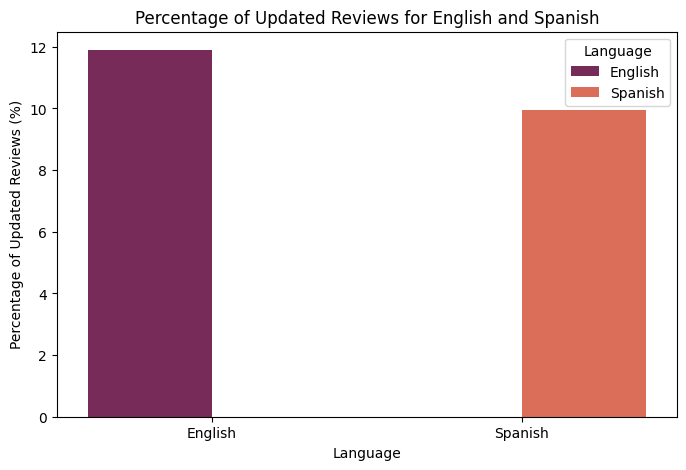

In [7]:
# we count how many reviews have been updated for both languages

updated_eng = df_eng.loc[df['timestamp_created'] != df['timestamp_updated']].count()
updated_spa = df_spa.loc[df['timestamp_created'] != df['timestamp_updated']].count()

#then calculate the percentages 
perc_eng = updated_eng / len(df_eng)
perc_spa = updated_spa/ len(df_spa)

# create a DataFrame to store the percentages for plotting
perc_df = pd.DataFrame({
    'Language': ['English', 'Spanish'],
    'Percentage': [perc_eng.iloc[0] * 100, perc_spa.iloc[0] * 100] 
})
# and plot the two percentages
plt.figure(figsize=(8, 5))
sns.barplot(x='Language', y='Percentage', data = perc_df, palette='rocket', hue = 'Language')
# create the labels for the axis and add the plot title
plt.ylabel('Percentage of Updated Reviews (%)')
plt.xlabel('Language')
plt.title('Percentage of Updated Reviews for English and Spanish')

# Display the plot
plt.show()


This plot shows us that the group that left the reviews in english is slightly more likelly to edit their review, but the difference is not very big. This could be due to the fact that many of the reviews left in english where not made by native english speakers, and could have made mistakes.

In [8]:
# Now we want to see how much time on average passes between the creation of the review and the update

#First we take only the reviews that have been updated and calculate the difference in seconds
updated_eng= df_eng.loc[df['timestamp_created'] != df['timestamp_updated']]

updated_spa= df_spa.loc[df['timestamp_created'] != df['timestamp_updated']]

updated_eng['time_difference'] = (updated_eng['timestamp_updated'] - updated_eng['timestamp_created']).dt.total_seconds()
updated_spa['time_difference'] = (updated_spa['timestamp_updated'] - updated_spa['timestamp_created']).dt.total_seconds()

#then calculate the average time difference in hours

average_time_difference_eng = updated_eng['time_difference'].mean() / 3600  
average_time_difference_spa = updated_spa['time_difference'].mean() / 3600  


# display the average time difference for English and Spanish reviews
print(f"Average time difference (in hours):\n english: {average_time_difference_eng:.2f}\nspanish: {average_time_difference_spa:.2f}\n")
print(f"Average time difference (in days):\n english: {average_time_difference_eng/24:.2f}\nspanish: {average_time_difference_spa/24:.2f}\n")


Average time difference (in hours):
 english: 8093.17
spanish: 7877.79

Average time difference (in days):
 english: 337.22
spanish: 328.24



/var/folders/2n/w4ltzfmx2tx7rpcv2z1fm1gm0000gn/T/ipykernel_81682/1684673699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_eng['time_difference'] = (updated_eng['timestamp_updated'] - updated_eng['timestamp_created']).dt.total_seconds()
/var/folders/2n/w4ltzfmx2tx7rpcv2z1fm1gm0000gn/T/ipykernel_81682/1684673699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_spa['time_difference'] = (updated_spa['timestamp_updated'] - updated_spa['timestamp_created']).dt.total_seconds()


However this is not very plausible since on average the reviews were updated almost a year after having been created, so it is more plausible that the reviews changed their opinion after playing the game or receiving an expansion.

---
## 6.2
### Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?
---

The same way as what we will have to do for the RQ7 we will need to remove some outliers from the dataset (this as been explained and justyfied in more details there) that could otherwise influence the means we are trying to calculate.

In [9]:

# just to show how big are the outliers in this dataset we will print the maximum of the variable games owned
print(max(df['author.num_games_owned']))
# this number is of course impossible

# we will then remove every value above the 99.9% quantile
q = df['author.num_games_owned'].quantile(0.999)
q_rev = df['author.num_reviews'].quantile(0.999)


new_df_filtered = df.loc[df['author.num_games_owned'] <= q]
new_df_filtered = new_df_filtered.loc[new_df_filtered['author.num_reviews'] <= q_rev]

# Now we can calculate the means with respeact to the different languages
mean_values = new_df_filtered.groupby('language')[['author.num_games_owned', 'author.num_reviews']].mean()

print(mean_values)


4398046511619
            author.num_games_owned  author.num_reviews
language                                              
brazilian                   98.009               9.075
bulgarian                   70.257               6.983
czech                      102.854               8.756
danish                      75.802               5.400
dutch                       77.059               5.408
english                    159.674              11.099
finnish                     93.666               7.738
french                     119.816               8.617
german                     134.019               8.467
greek                       68.916               6.617
hungarian                  100.153               8.179
italian                    133.951              11.470
japanese                   172.920              12.708
koreana                     90.604              10.988
latam                      129.718              11.599
norwegian                   86.175               5.

In [10]:
# Reset the index to make 'language' a column in mean_values
mean_values = mean_values.reset_index()

# Filter the mean values for English and Spanish
mean_eng = mean_values.loc[mean_values['language'] == 'english']

mean_spa = mean_values.loc[mean_values['language'] == 'spanish']

Averages for english group:
[159.67408561  11.09908876]

Averages for spanish group:
[116.99540151   9.05697081]

Ratio for english group: 14.39 

Ratio for spanish group: 12.92 



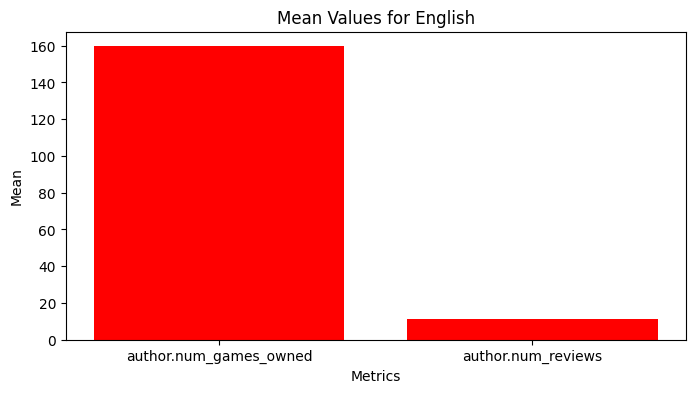

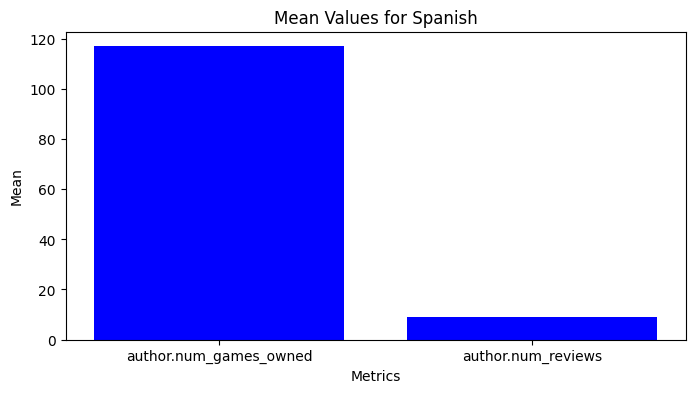

In [11]:
#also produce the ratio between the two means: num_games/num_reviews
ratio_eng = (mean_eng['author.num_games_owned'].values/mean_eng['author.num_reviews'].values).astype(float)
ratio_spa = (mean_spa['author.num_games_owned'].values/mean_spa['author.num_reviews'].values).astype(float)


print(f"Averages for english group:\n{mean_eng[['author.num_games_owned','author.num_reviews']].values[0]}\n")
print(f"Averages for spanish group:\n{mean_spa[['author.num_games_owned','author.num_reviews']].values[0]}\n")
print(f"Ratio for english group: {ratio_eng[0]:.2f} \n")
print(f"Ratio for spanish group: {ratio_spa[0]:.2f} \n")
# had to do some strange slicing to have a good print

# Plot for English
plt.figure(figsize=(8, 4))

plt.bar(mean_eng.columns[1:], mean_eng.values[0][1:], color='red')
plt.title('Mean Values for English')
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.show()

# Plot for Spanish
plt.figure(figsize=(8, 4))

plt.bar(mean_spa.columns[1:], mean_spa.values[0][1:], color='blue')
plt.title('Mean Values for Spanish')
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.show()

Both for the english reviews and the spanish reviews left by the users, the plot shows that on average the reviews own many more games than reviews, to be more precise:
The english group has a ratio of 14.39 and the spanish group of 12.92. 
This suggest that the reviews review only a small part of the games they own, but this is also not compleately true: It could also be that many of the reviews were left for games that were not in the Steam collection of the users as we showed in RQ2 (point 2.3). This means that this ratio may be even larger if it could be properly calculated accounting for that.

---
# RQ7
---

---
## 7.1 & 7.2

### P1 = "probability of submitting a review and receiving at least one helpful vote"
### P2 = "probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app"
---


In [12]:
df = pd.read_csv(csv_file_path, usecols = ['app_name',
                                                 'recommended',
                                                 'review',
                                                 'votes_helpful',
                                                 'author.steamid',
                                                 'author.num_games_owned',
                                                 'author.num_reviews'])


In [13]:
df['votes_helpful'].describe()

count        21747371.000
mean           404468.855
std        1333740760.952
min                 0.000
25%                 0.000
50%                 0.000
75%                 1.000
max     4398046511106.000
Name: votes_helpful, dtype: float64

We can see from this short description of the variable **votes_helpful** that there are some impossibly high instances, as indicated by the maximum. Let's look for this outliers!

In [14]:
q = df['votes_helpful'].quantile(0.999)

count_q = df['votes_helpful'].loc[df['votes_helpful'] > q].count()
totcount = df['votes_helpful'].count()

print(f"the 0.999 quantile: {q} \nThe total number of values in votes_helpful: {totcount} \nThe number of values above 0.999 quantile: {count_q} ")

the 0.999 quantile: 240.0 
The total number of values in votes_helpful: 21747371 
The number of values above 0.999 quantile: 21637 


As we can see there are many outliers in this dataset, many of this values could be possible but taking a look at the maximum value of 4,398,047,000,000 there is no mistake that this is an error.

Let's take a look at the rows with the two largest values

In [15]:
# get the largest two values
df.loc[df['votes_helpful'] > 1000000]

app_name                                             review  \
10449392     Broforce  Jogo muito bom. Recomendo ele, vale cada centa...   
10751984  Bloons TD 6  I don't know what to say, but just to go pop s...   

          recommended  votes_helpful     author.steamid  \
10449392         True  4398046511104  76561198315745673   
10751984         True  4398046511106  76561198049020554   

          author.num_games_owned  author.num_reviews  
10449392                     100                   2  
10751984                    3524                 322

Using their SteamId values it is actually possible to find online the users and their reviews and we could of course correct the dataset:

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [16]:
# modify the original df
df.loc[df['votes_helpful'] > 1000000, 'votes_helpful'] = [0, 3]

#check 
df.loc[(df['app_name'] == 'Bloons TD 6') & (df['author.steamid'] == 76561198049020554) ]

app_name                                             review  \
10751984  Bloons TD 6  I don't know what to say, but just to go pop s...   

          recommended  votes_helpful     author.steamid  \
10751984         True              3  76561198049020554   

          author.num_games_owned  author.num_reviews  
10751984                    3524                 322

Doing this for all values above the 99.9% quantile would be of course impracticle. Therefore to be more conservative we chose to get rid of all values above the 99.9% quantile.

In [17]:
new_df_filtered = df.loc[df['votes_helpful'] <= q]
new_df_filtered['votes_helpful'].describe()

count   21725736.000
mean           1.199
std            7.609
min            0.000
25%            0.000
50%            0.000
75%            1.000
max          240.000
Name: votes_helpful, dtype: float64

## P1:

In [18]:
tot = len(new_df_filtered['votes_helpful'])
helpful_df = new_df_filtered.loc[new_df_filtered['votes_helpful'] >= 1, 'votes_helpful']
E = len(helpful_df)
prob = f"{E/tot:.1%}"
print(prob)

28.0%


## P2:

In [19]:
tot = len(new_df_filtered.loc[df['recommended']== False])
helpful_F_df = new_df_filtered.loc[(new_df_filtered['votes_helpful'] >= 1) & (new_df_filtered['recommended'] == False), 'votes_helpful']
E = len(helpful_F_df)
prob = f"{E/tot:.1%}"
print(prob)


48.3%


---
## 7.3

### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review" ?
---

We can do this by creating a new dataframe with two categorical variables. The first will be true when the review received more than 1 helpful vote, the second when the author of the review has a number of reviews owned of at least five. We will use the df created before.

In [20]:
#create the new DataFrame
df = pd.DataFrame(columns=['Votes_Helpful', 'Number_of_Reviews'])

#check if the two conditions are true and add the result into the new columns
df['Votes_Helpful'] = np.where(new_df_filtered['votes_helpful'] >= 1, True, False)
df['Number_of_Reviews'] = np.where(new_df_filtered['author.num_reviews'] >= 5, True, False)

#let's create a contingency table:
contingency_table = pd.crosstab(df['Votes_Helpful'], df['Number_of_Reviews'])
print(contingency_table)

#apply chi square test of indipendence

chi2, p, dof, expected = chi2_contingency(contingency_table)

# and print the results
print("\nChi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)


Number_of_Reviews    False    True 
Votes_Helpful                      
False              9136432  6505696
True               2696540  3387068

Chi-square Statistic: 350347.77885149146
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
 [[8519520.93334909 7122607.06665091]
 [3313451.06665091 2770156.93334909]]


Since our dataframe contains a large number of observations we can compute the chi square test, this test's results are shown above. The p-value is practically zero, this tells us that we can refute the null hipotesys of indipendence and that therefore the two variables are actually dependent.

another way to quickly show this is by calculating: $$ P(A \cap B) = P(A) \times P(B) $$



In [21]:
N = len(df)

# probability of the review receiving at least one helpful vote
P_A = (df['Votes_Helpful'].loc[df['Votes_Helpful'] == True].count()) /N

# probability the reviewer has submitted at least five reviews before the current review
P_B = (df['Number_of_Reviews'].loc[df['Number_of_Reviews'] == True].count()) /N

# Interection:
Int = df.loc[(df['Number_of_Reviews'] == True) & (df['Votes_Helpful'] == True)].count()
# Probability of the intersection of these two events:
P_intersect = (Int.iloc[0]) /N

print(f"Probability of event A: {P_A}\nProbability of event B: {P_B}/n")
print(f"Product: {P_A*P_B}\nProbability of the intersection: {P_intersect}")

print(f"Is the equality confirmed? {P_intersect == P_A*P_B}")


Probability of event A: 0.2800184997184906
Probability of event B: 0.45534770375558276/n
Product: 0.12750578085589798
Probability of the intersection: 0.15590118558008806
Is the equality confirmed? False


---
### 7.4 
### Do reviewers who own a larger number of games likely leave fewer reviews on the platform?
---
We are now looking at two specific variables: author.num_games_owned and author.num_reviews (and not the number of reviews contained in the dataset for each author).
However since there are many reviews in this dataset left from the same authors, for the scope of this research question we should create a new dataset with one row for each author.steamid.

Let's see if the values for the two columns change between each row with the same steamid:

In [22]:
df = pd.read_csv(csv_file_path, usecols = ['app_name', 'author.steamid',
                                                 'author.num_games_owned', 'author.num_reviews', 'timestamp_updated', 'timestamp_created'])

df['author.steamid'].value_counts()

76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
                    ... 
76561198250262486      1
76561197994402900      1
76561198087460095      1
76561198024665035      1
76561198046495482      1
Name: author.steamid, Length: 12406560, dtype: int64

In [23]:
#let's take a look at the first one, but even before that let's convert the timestamps into readable dates

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')

#format

df['timestamp_created'] = df['timestamp_created'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['timestamp_updated'] = df['timestamp_updated'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [24]:
df.loc[df['author.steamid']==76561198062813911].describe()

author.steamid  author.num_games_owned  author.num_reviews
count               149.000                 149.000             149.000
mean  76561198062813920.000                1584.000            1621.000
std                  48.162                   0.000               0.000
min   76561198062813904.000                1584.000            1621.000
25%   76561198062813904.000                1584.000            1621.000
50%   76561198062813904.000                1584.000            1621.000
75%   76561198062813904.000                1584.000            1621.000
max   76561198062813904.000                1584.000            1621.000

Looking at this table and in particular at the standard deviation, we could infer that all the values for the columns "author.num_games_owned" and "author.num_reviews" will not change between different rows with the same steam_id value.
This however is not true as we can show for the second Id of the previous list.

In [25]:
#second id for number of reviews in the dataset
df.loc[df['author.steamid']==76561198315585536].describe()

author.steamid  author.num_games_owned  author.num_reviews
count               132.000                 132.000             132.000
mean  76561198315585536.000                1350.053            1103.189
std                   0.000                   1.584               3.469
min   76561198315585536.000                1349.000            1101.000
25%   76561198315585536.000                1349.000            1101.000
50%   76561198315585536.000                1350.000            1101.000
75%   76561198315585536.000                1350.000            1105.000
max   76561198315585536.000                1357.000            1114.000

To answer the original question we then have to decide how to treat this variability.

In [26]:
#let's take a look at some of the rows for this steam id
df.loc[df['author.steamid']==76561198315585536]

app_name    timestamp_created  \
270500       The Witcher 3: Wild Hunt  2019-04-10 00:33:55   
1119421                   Garry's Mod  2019-12-17 02:50:57   
1597361    Sid Meier's Civilization V  2019-10-05 02:38:52   
1979092              Dead by Daylight  2019-04-07 16:55:29   
2233484   Sid Meier's Civilization VI  2019-10-04 06:33:24   
...                               ...                  ...   
21285904    Resident Evil 7 Biohazard  2019-09-11 01:55:16   
21365310           Night in the Woods  2019-10-14 05:44:24   
21402577                    Northgard  2019-06-04 18:40:44   
21440420               Sniper Elite 4  2019-04-15 09:38:02   
21519602                Hollow Knight  2020-04-29 19:33:22   

            timestamp_updated     author.steamid  author.num_games_owned  \
270500    2019-04-10 00:33:55  76561198315585536                    1350   
1119421   2019-12-17 02:50:57  76561198315585536                    1350   
1597361   2019-10-05 02:38:52  76561198315585536                    1350   
1979092   2019-04-07 16:55:29  76561198315585536                    1349   
2233484   2019-10-04 06:33:24  76561198315585536                    1350   
...                       ...                ...                     ...   
21285904  2019-09-11 01:55:16  76561198315585536                    1350   
21365310  2019-10-14 05:44:24  76561198315585536                    1350   
21402577  2019-06-04 18:40:44  76561198315585536                    1350   
21440420  2019-04-15 09:38:02  76561198315585536                    1350   
21519602  2020-04-29 19:33:22  76561198315585536                    1349   

          author.num_reviews  
270500                  1114  
1119421                 1101  
1597361                 1101  
1979092                 1101  
2233484                 1114  
...                      ...  
21285904                1105  
21365310                1105  
21402577                1105  
21440420                1105  
21519602                1101  

[132 rows x 6 columns]

As we can see there are stange "inconsistencies" in the dataset, for example the number of reviews owned by this user of the platform jumps from 1101 in 07 April 2019 to 1114 in 04 Nov 2019 and then back to 1101 on 29 April 2020.
To use the values contained in these two columns and answer our research question we will take the mean for both and assign it to each row. Then we will eliminate all duplicate rows.

In [27]:
# Calculate the mean for each 'author.steamid' group for the specific columns
mean_values = df.groupby('author.steamid')[['author.num_games_owned', 'author.num_reviews']].transform('mean')
#The transform('mean') function computes the mean for each group created by groupby('author.steamid') 
#and returns a DataFrame where each row has the mean value for its group. 
# But most importantly it does this preserving the original rows' structure.

# Assign the calculated mean back to the original DataFrame is easy 
df[['author.num_games_owned', 'author.num_reviews']] = mean_values.astype(int)

# we rounded the means because the two columns contained count values

new_df = df[['author.steamid','author.num_games_owned','author.num_reviews']].drop_duplicates(subset = 'author.steamid') 
# this function drops all repeating occurrencies of the variable steamid keeping only the first one



In [28]:
new_df 

author.steamid  author.num_games_owned  author.num_reviews
0         76561199095369542                       6                   1
1         76561198949504115                      30                   9
2         76561199090098988                       5                   1
3         76561199054755373                       5                   3
4         76561199028326951                       7                   3
...                     ...                     ...                 ...
21747359  76561197968100319                     181                   1
21747360  76561197964537313                     141                   3
21747363  76561197961063360                     122                   3
21747365  76561197970410091                     196                  16
21747367  76561198046495482                      70                  10

[12406560 rows x 3 columns]

Now we can see the characteristics of this two variables

In [29]:
# print some basic statistics
print(new_df['author.num_games_owned'].describe())
print(new_df['author.num_reviews'].describe())

# find the 0.999 quantile and how many values are above this quantile

q = new_df['author.num_games_owned'].quantile(0.999)
count_q = new_df['author.num_games_owned'].loc[df['author.num_games_owned'] >= q].count()
q_rev = new_df['author.num_reviews'].quantile(0.999)
count_q_rev = new_df['author.num_reviews'].loc[df['author.num_reviews'] >= q_rev].count()

# we print out the quantile and the number of rows with higher numbers than the quantiles
print(f"\n0.999 quantile for variable \"number of games owned\": {int(q)}")
print(f"Number of entries above 0.999 quantile of author.num_games_owned = {count_q}")
print(f"\n0.999 quantile for variable \"number of reviews owned\": {int(q_rev)}")
print(f"Number of entries above 0.999 quantile of author.num_reviews = {count_q_rev} ")

count        12406560.000
mean           700635.018
std        1407361704.393
min                 0.000
25%                13.000
50%                38.000
75%                96.000
max     4398046511170.000
Name: author.num_games_owned, dtype: float64
count        12406560.000
mean           708991.220
std        1765830883.363
min                 1.000
25%                 1.000
50%                 2.000
75%                 4.000
max     4398046511108.000
Name: author.num_reviews, dtype: float64

0.999 quantile for variable "number of games owned": 2110
Number of entries above 0.999 quantile of author.num_games_owned = 12418

0.999 quantile for variable "number of reviews owned": 93
Number of entries above 0.999 quantile of author.num_reviews = 12425 


As we can see, similarly as to what we encountered before in this RQ, there are a great number of outliers in this dataset regarding this two variables.
Of course again this could be due to some error in the creation of the dataset or simply real world anomalies as the dataset is so large.
However ,as before, a maximum value of games and review owned of 4,398,047,000,000 is clearly impossible. 
We therefore chose once more to remove all the values above the 0.999 quantile from our dataset.

In [30]:
new_df_filtered = new_df.loc[new_df['author.num_games_owned'] <= q]
new_df_filtered = new_df_filtered.loc[new_df_filtered['author.num_reviews'] <= q_rev]

new_df_filtered.describe()

author.steamid  author.num_games_owned  author.num_reviews
count          12383097.000            12383097.000        12383097.000
mean  76561198344412992.000                  84.046               3.779
std           339965813.148                 142.195               5.820
min   76561197960265728.000                   0.000               1.000
25%   76561198083309088.000                  13.000               1.000
50%   76561198219269824.000                  38.000               2.000
75%   76561198425366496.000                  96.000               4.000
max   76561199133265376.000                2110.000              93.000

Finally having cleared the dataset we can now analyse the relationship between number of games owned and number of reviews

Pearson correlation coefficient: 0.3542071055220868
Pearson p-value: 0.0

Spearman correlation coefficient: 0.4982477482775826
Spearman p-value: 0.0



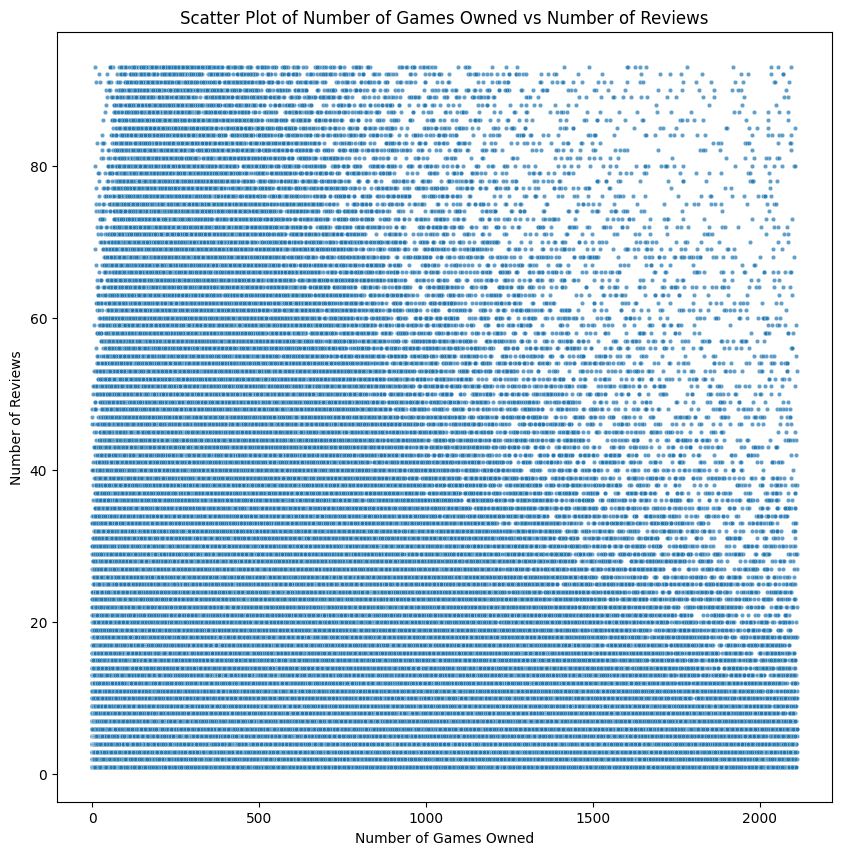

In [31]:
# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(new_df_filtered['author.num_games_owned'], new_df_filtered['author.num_reviews'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"Pearson p-value: {p_value}\n")

# Calculate Spearman's correlation coefficient
spearman_corr, spearman_p_value = spearmanr(new_df_filtered['author.num_games_owned'], new_df_filtered['author.num_reviews'])
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}\n")


# Create a scatter plot to visually see how the data points are distributed
plt.figure(figsize=(10, 10))
sns.scatterplot(data= new_df_filtered, x="author.num_games_owned", y="author.num_reviews",s=10 ,alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Number of Games Owned vs Number of Reviews')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')
 

# Show the plot
plt.show()


Since there are so many instances in this dataset, this scatterplot is actually very hard to read. Judging by the thinning in the cloud of points in the upper right quadrant we could think that people with higher number of games owned leave generally less reviews by comparison to users with less games owned. This however is false, when we take a look at these two correlation coefficients calculated above, both are positive and relatively low, suggesting the presence of some kind of weak positive correlation between the two variables in exam. The problem resides in the fact that most of the users in this dataset have a low number of games in they collections, this makes this plot misleading.

Let's add to this scatter plot the two medians and count how many data points are above the median for number of reviews, then we will see how many of this data points come from users with above median number of games owned and how many from below.

Median of Number of Games Owned: 38.0
Median of Number of Reviews: 2.0

Number of instances above both medians: 3601775

Number of instances above both median for n. review and under for n. games owned: 1435115



/Users/sezermezgil/anaconda3/envs/tf_m1/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


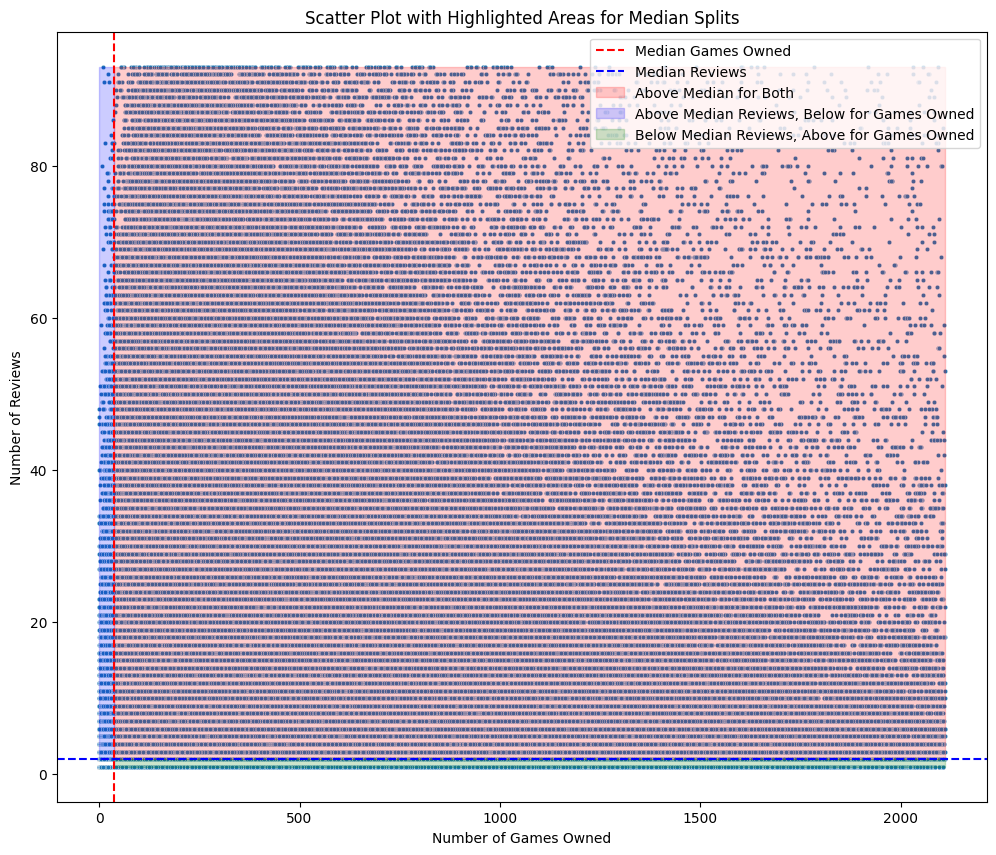

In [32]:
# Calculate the median for number of games owned
median_games_owned = new_df_filtered['author.num_games_owned'].median()
print(f"Median of Number of Games Owned: {median_games_owned}")

# Calculate the median for number of reviews
median_reviews = new_df_filtered['author.num_reviews'].median()
print(f"Median of Number of Reviews: {median_reviews}\n")


# Count values above the median for number of reviews and above the median for number of games owned
count_above = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > median_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] > median_games_owned)].count()
print(f"Number of instances above both medians: {count_above.iloc[0]}\n")
# Count values above the median for number of reviews and under the median for number of games owned (median included)
count_under = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > median_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] <= median_games_owned)].count()
print(f"Number of instances above both median for n. review and under for n. games owned: {count_under.iloc[0]}\n")

# Scatter plot with areas highlighted
plt.figure(figsize=(12, 10))

# Scatter plot of the data points
sns.scatterplot(data=new_df_filtered, x='author.num_games_owned', y='author.num_reviews',s=10)

# Add vertical and horizontal lines at the median values
plt.axvline(median_games_owned, color='red', linestyle='--', label='Median Games Owned')
plt.axhline(median_reviews, color='blue', linestyle='--', label='Median Reviews')

# Highlight the area where both variables are greater than the median
plt.fill_betweenx(y=[median_reviews, new_df_filtered['author.num_reviews'].max()],
                  x1=median_games_owned, x2=new_df_filtered['author.num_games_owned'].max(),
                  color='red', alpha=0.2, label='Above Median for Both')

# Highlight the area where the number of reviews is above the median, but games owned is below or equal to the median
plt.fill_betweenx(y=[median_reviews, new_df_filtered['author.num_reviews'].max()],
                  x1=new_df_filtered['author.num_games_owned'].min(), x2=median_games_owned,
                  color='blue', alpha=0.2, label='Above Median Reviews, Below for Games Owned')

# Highlight the area where the number of reviews is below or equal to the median, but games owned is above the median
plt.fill_betweenx(y=[new_df_filtered['author.num_reviews'].min(), median_reviews],
                  x1=median_games_owned, x2=new_df_filtered['author.num_games_owned'].max(),
                  color='green', alpha=0.2, label='Below Median Reviews, Above for Games Owned')

# Add title and labels
plt.title('Scatter Plot with Highlighted Areas for Median Splits')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()



This plot is perfect for pinpointing what was misleading about the other graph, as we can see the range of variation in the values is huge compared to the actual median which tells us that for example 50% of the total users have a number of reviews <= 2.

Even looking at larger values like the 0.75 quantiles, we can see that most users have very few reviews and games. Here below we are comparing two largely different groups for size, we are actually counting how many of the 25% of the total users with higher number of games owned are above the 75% quantile for number of reviews, and comparing it with 75% rest of the total Steam users.

In [33]:
# Calculate the 75% quantile for number of games owned
quantile_games_owned = new_df_filtered['author.num_games_owned'].quantile(0.75)
print(f"0.75e quantile of Number of Games Owned: {quantile_games_owned}")

# Calculate the 90% quantile for number of reviews
quantile_reviews = new_df_filtered['author.num_reviews'].quantile(0.9)
print(f"0.9 quantile of Number of Reviews: {quantile_reviews}\n")

# Let's check the total size of this two groups identified by the Number of Games Owned quantile.
Total_above75 = new_df_filtered.loc[new_df_filtered['author.num_games_owned'] > quantile_games_owned].count()
Total_under75 = new_df_filtered.loc[new_df_filtered['author.num_games_owned'] <= quantile_games_owned].count()
print(f"Size of the two groups:\nGroup #1: {Total_above75.iloc[0]}\nGroup #2: {Total_under75.iloc[0]}\n")

# Count number of users above both 75% quantiles
count_above = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > quantile_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] > quantile_games_owned)].count()
print(f"Number of users above both quantiles: {count_above.iloc[0]}")

ratio_above = count_above / Total_above75
print(f"Ratio for the first group (> 75% q): {ratio_above.iloc[0]:.2%}\n")

# Count values above the median for number of reviews and under the median for number of games owned (median included)
count_under = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > quantile_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] <= quantile_games_owned)].count()
print(f"Number of instances above 75% quantile for n. review and under for n. games owned: {count_under.iloc[0]}")

ratio_under = count_under / Total_under75

print(f"Ratio for the second group (<= 75% q): {ratio_under.iloc[0]:.2%}")



0.75e quantile of Number of Games Owned: 96.0
0.9 quantile of Number of Reviews: 8.0

Size of the two groups:
Group #1: 3065758
Group #2: 9317339

Number of users above both quantiles: 715939
Ratio for the first group (> 75% q): 23.35%

Number of instances above 75% quantile for n. review and under for n. games owned: 405400
Ratio for the second group (<= 75% q): 4.35%


We see now that even if the count is relatively similar the actual ratio is much higher for the first group, indicating that users with relatively higher number of games in their Steam's library also tend to have the greater number of reviews on the site.

---
# Bonus
---

In [34]:
import openai

openai.api_key = 'YOUR_API_KEY'  
def get_review_sentiment(review_text):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies reviews as positive or negative."},
            {"role": "user", "content": f"Please classify the following review as positive or negative: '{review_text}'"}
        ]
    )
    
    sentiment = response['choices'][0]['message']['content'].strip()
    return sentiment


index = 10  
review_text = df['review'].iloc[index]

sentiment = get_review_sentiment(review_text)
print(f"Review sentiment for index {index}: {sentiment}")

KeyError: 'review'

---
# AQ
---

### Implement a Python program to solve the problem above.


I consider two cases when there is a choice of all unnumbered numbers or even numbers. If odd numbers n - k +1 must be greater than zero and odd and also similarly with even numbers n-2*k+2 greater than zero and even.





In [ ]:
from functions import algo_question
print(algo_question("input.txt"))


YES
6 2 2
YES
97 1 1 1
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
3 1 1


### Complexity analysis
My result O(t*k) Since we theoretically have two cycles

### Chat GPT result
Overall Time Complexity
Per Test Case: Each iteration of the loop performs O(k) operations due to string concatenation.
Total: With t test cases, the overall time complexity is O(t * k).
Space Complexity
The space used by the result list is also O(t * k) due to storing strings proportional to k for each of the t test cases.